In [1]:
import numpy as np
import numpy.linalg as la
from numpy.typing import NDArray
from math import factorial
from itertools import permutations

In [2]:
def to_string(a):
	result = ""
	for i in range(len(a)):
		for j in range(len(a[i])):
			if j != len(a) - 1:
				result += str(a[i][j]) + ", "
			else:
				result += str(a[i][j]) + "; "
	return "[" + result[:-2] + "]"

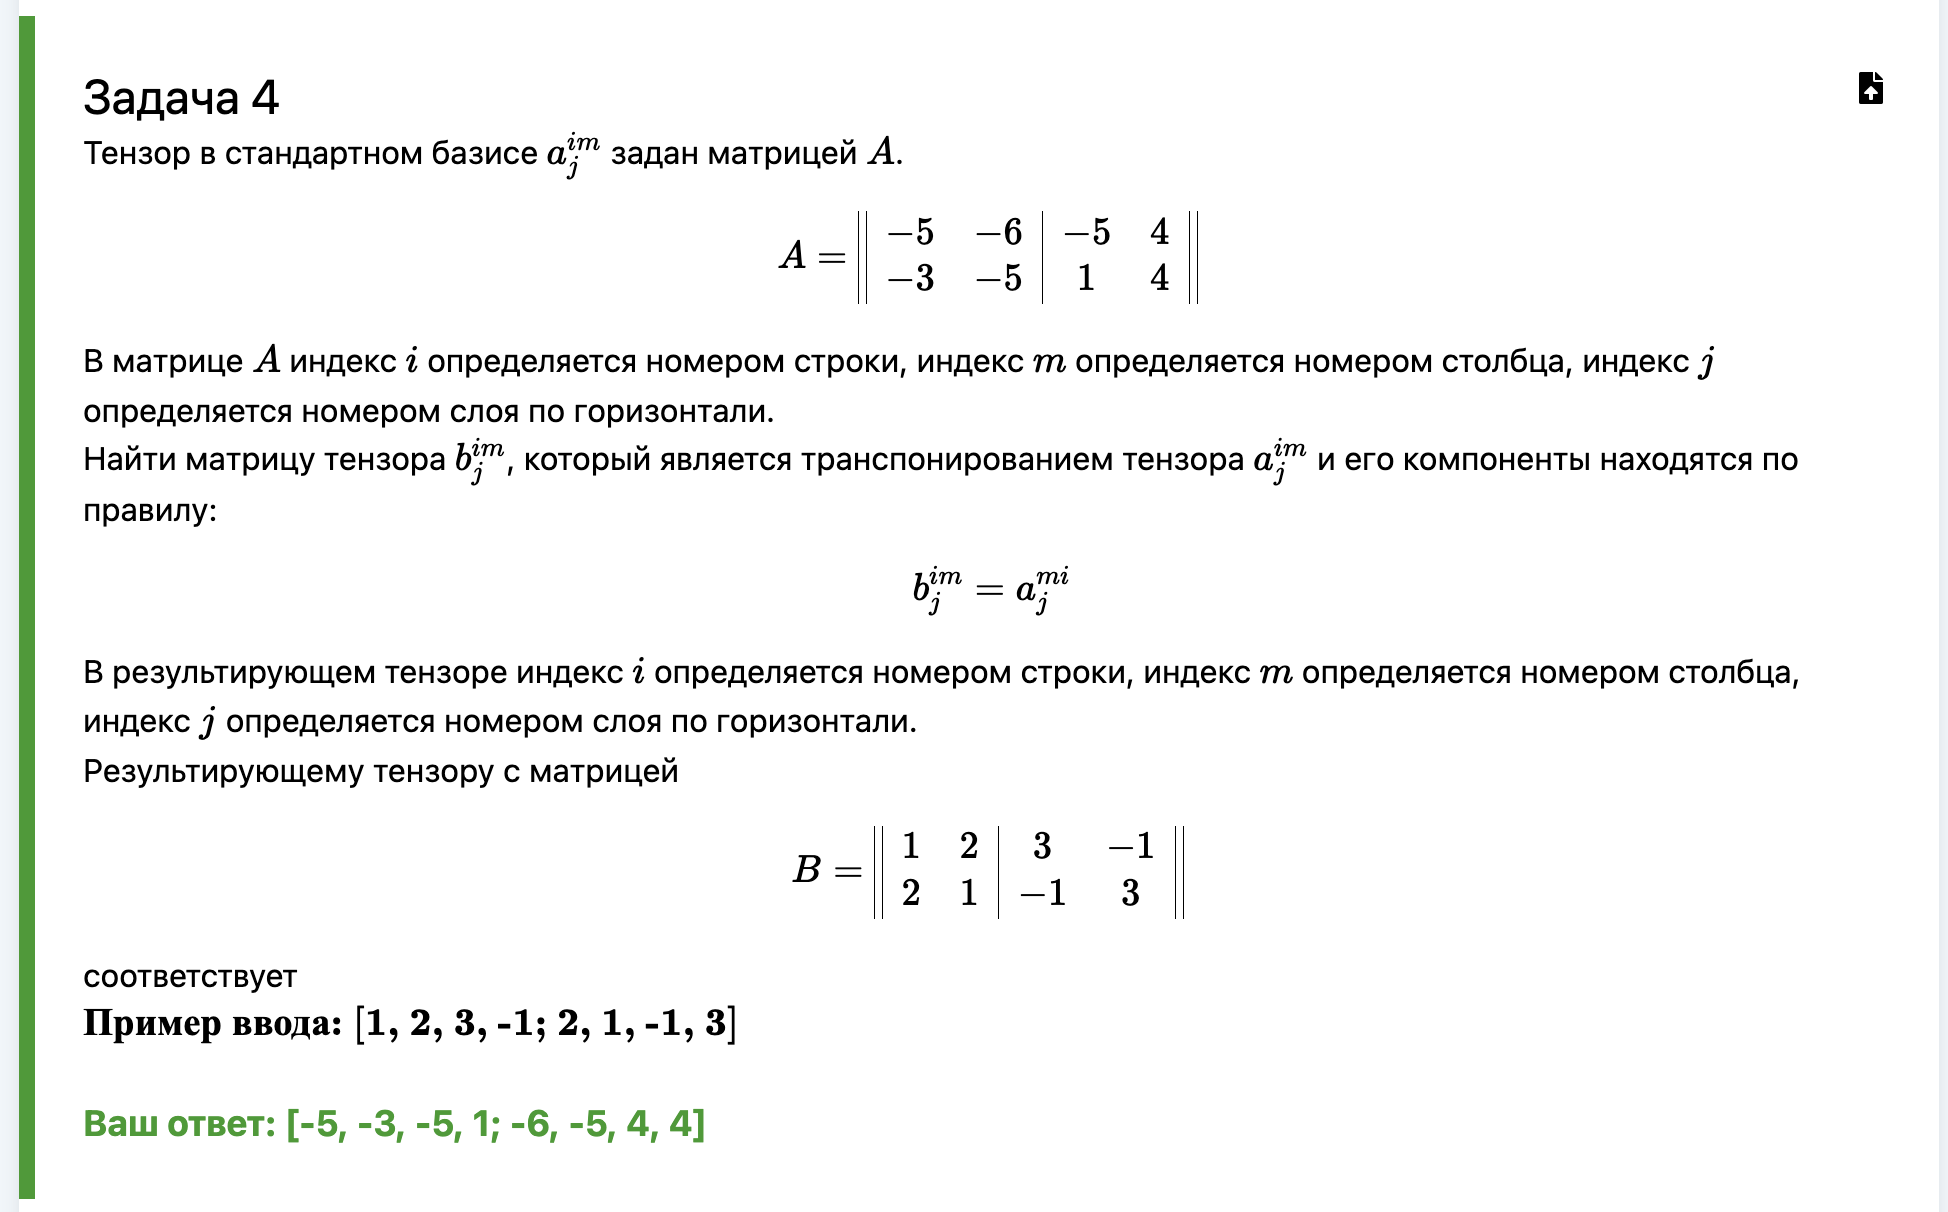

In [3]:
A = np.array([[[-5, -6], [-3, -5]], [[-5, 4], [1, 4]]])
B = np.copy(A)
for j in range(2):
    for i in range(2):
        for m in range(2):
            B[j][m][i] = A[j][i][m]
B

array([[[-5, -3],
        [-6, -5]],

       [[-5,  1],
        [ 4,  4]]])

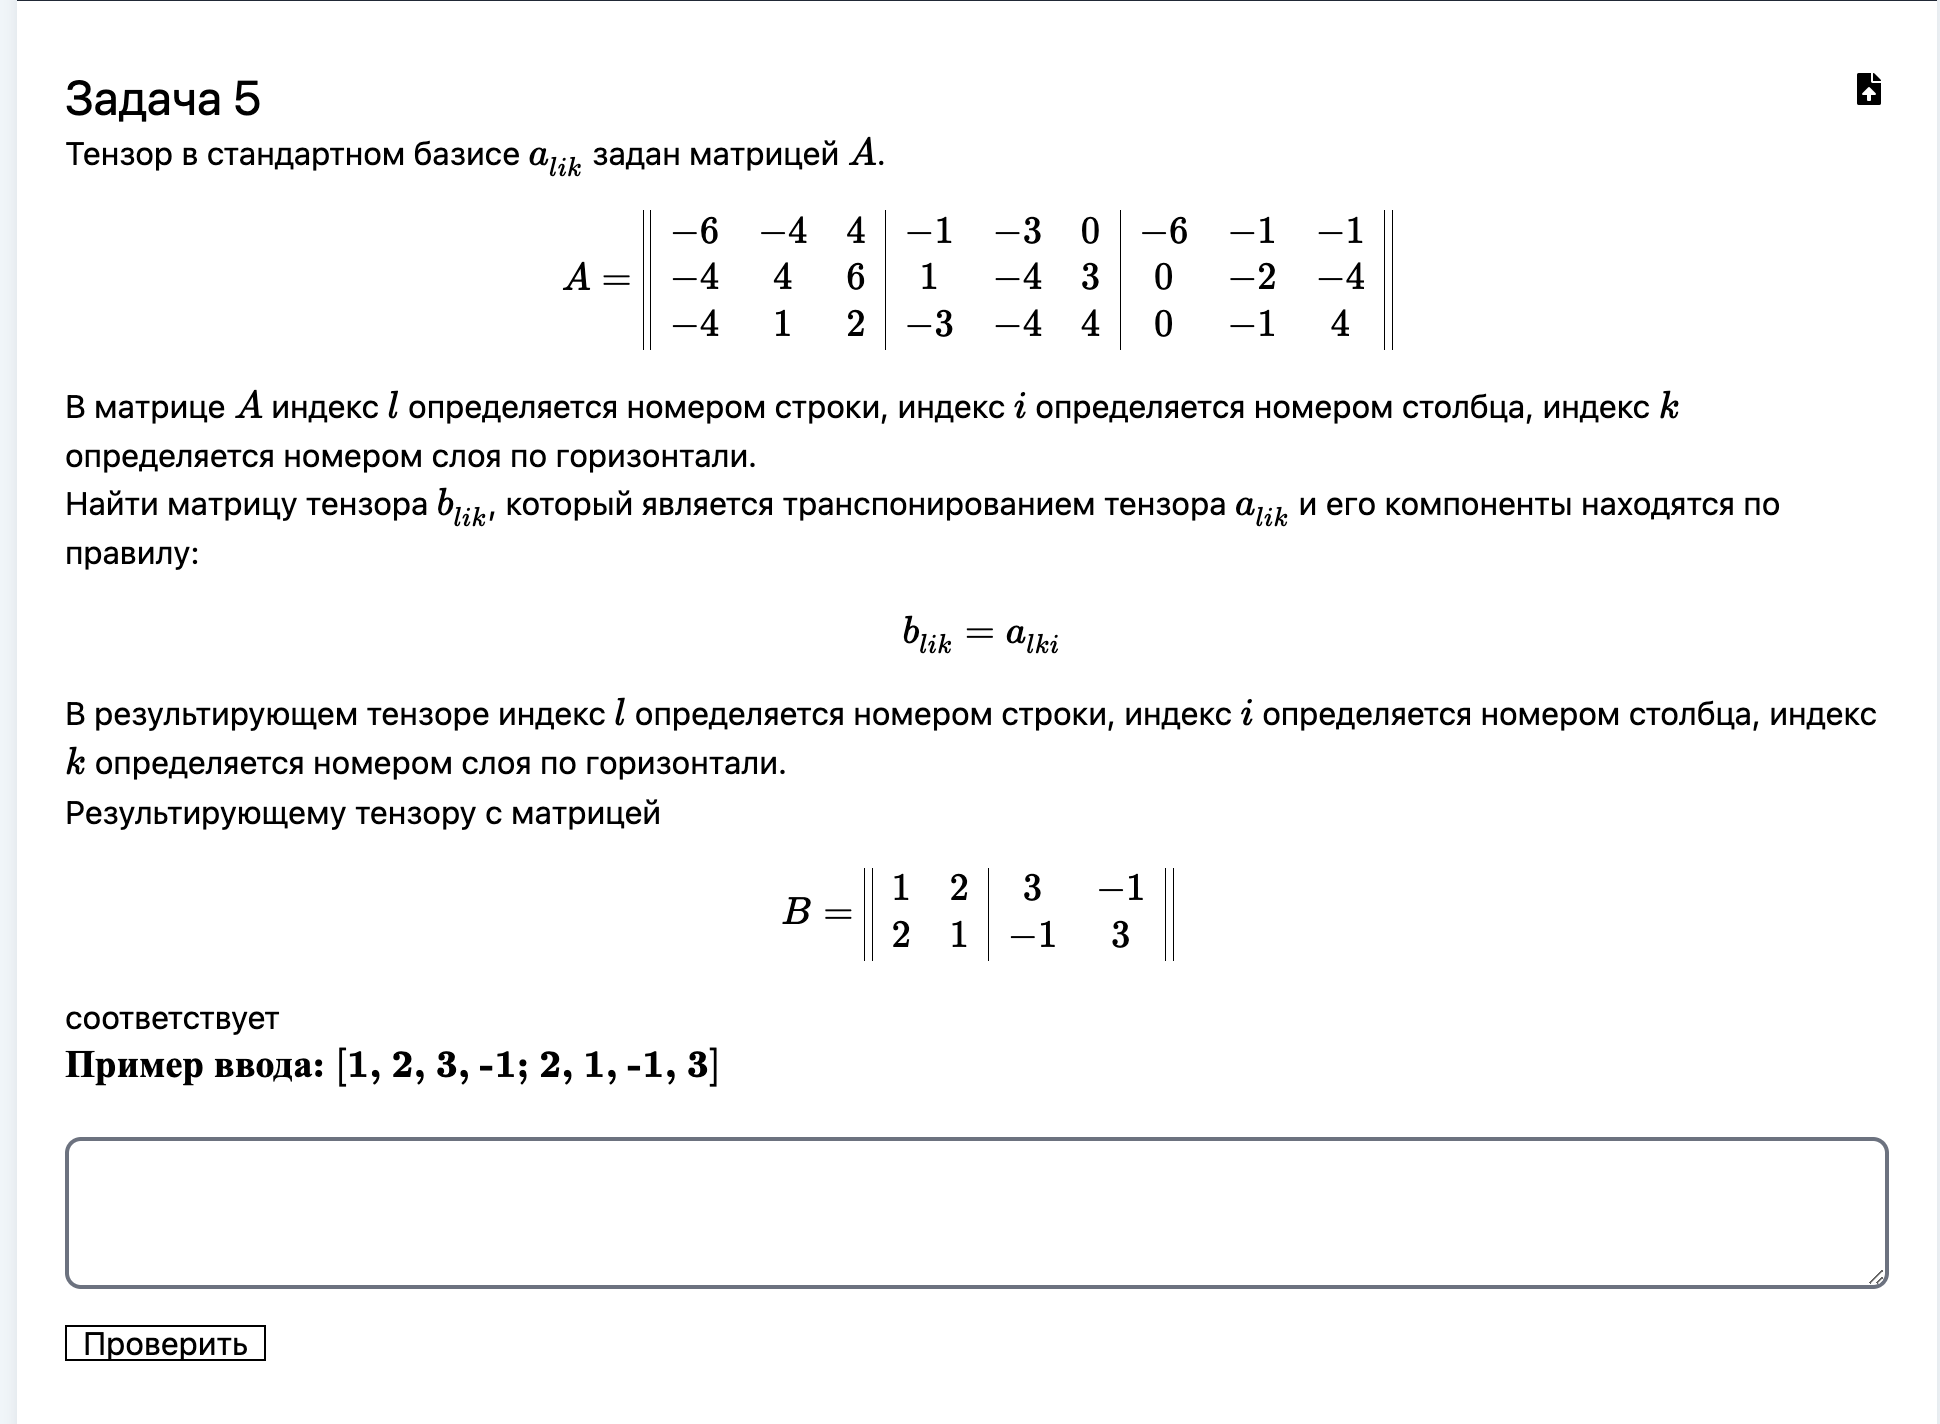

In [4]:
A = np.array([[[-6, -4, 4], [-4, 4, 6], [-4, 1, 2]], [[-1, -3, 0], [1, -4, 3], [-3, -4, 4]], [[-6, -1, -1], [0, -2, -4], [0, -1, 4]]])
B = np.copy(A)
for k in range(3):
    for l in range(3):
        for i in range(3):
            B[i][l][k] = A[k][l][i]
B
# [-6, -1, -6, -4, -3, -1, 4, 0, -1; -4, 1, 0, 4, -4, -2, 6, 3, -4; -4, -3, 0, 1, -4, -1, 2, 4, 4]

array([[[-6, -1, -6],
        [-4,  1,  0],
        [-4, -3,  0]],

       [[-4, -3, -1],
        [ 4, -4, -2],
        [ 1, -4, -1]],

       [[ 4,  0, -1],
        [ 6,  3, -4],
        [ 2,  4,  4]]])

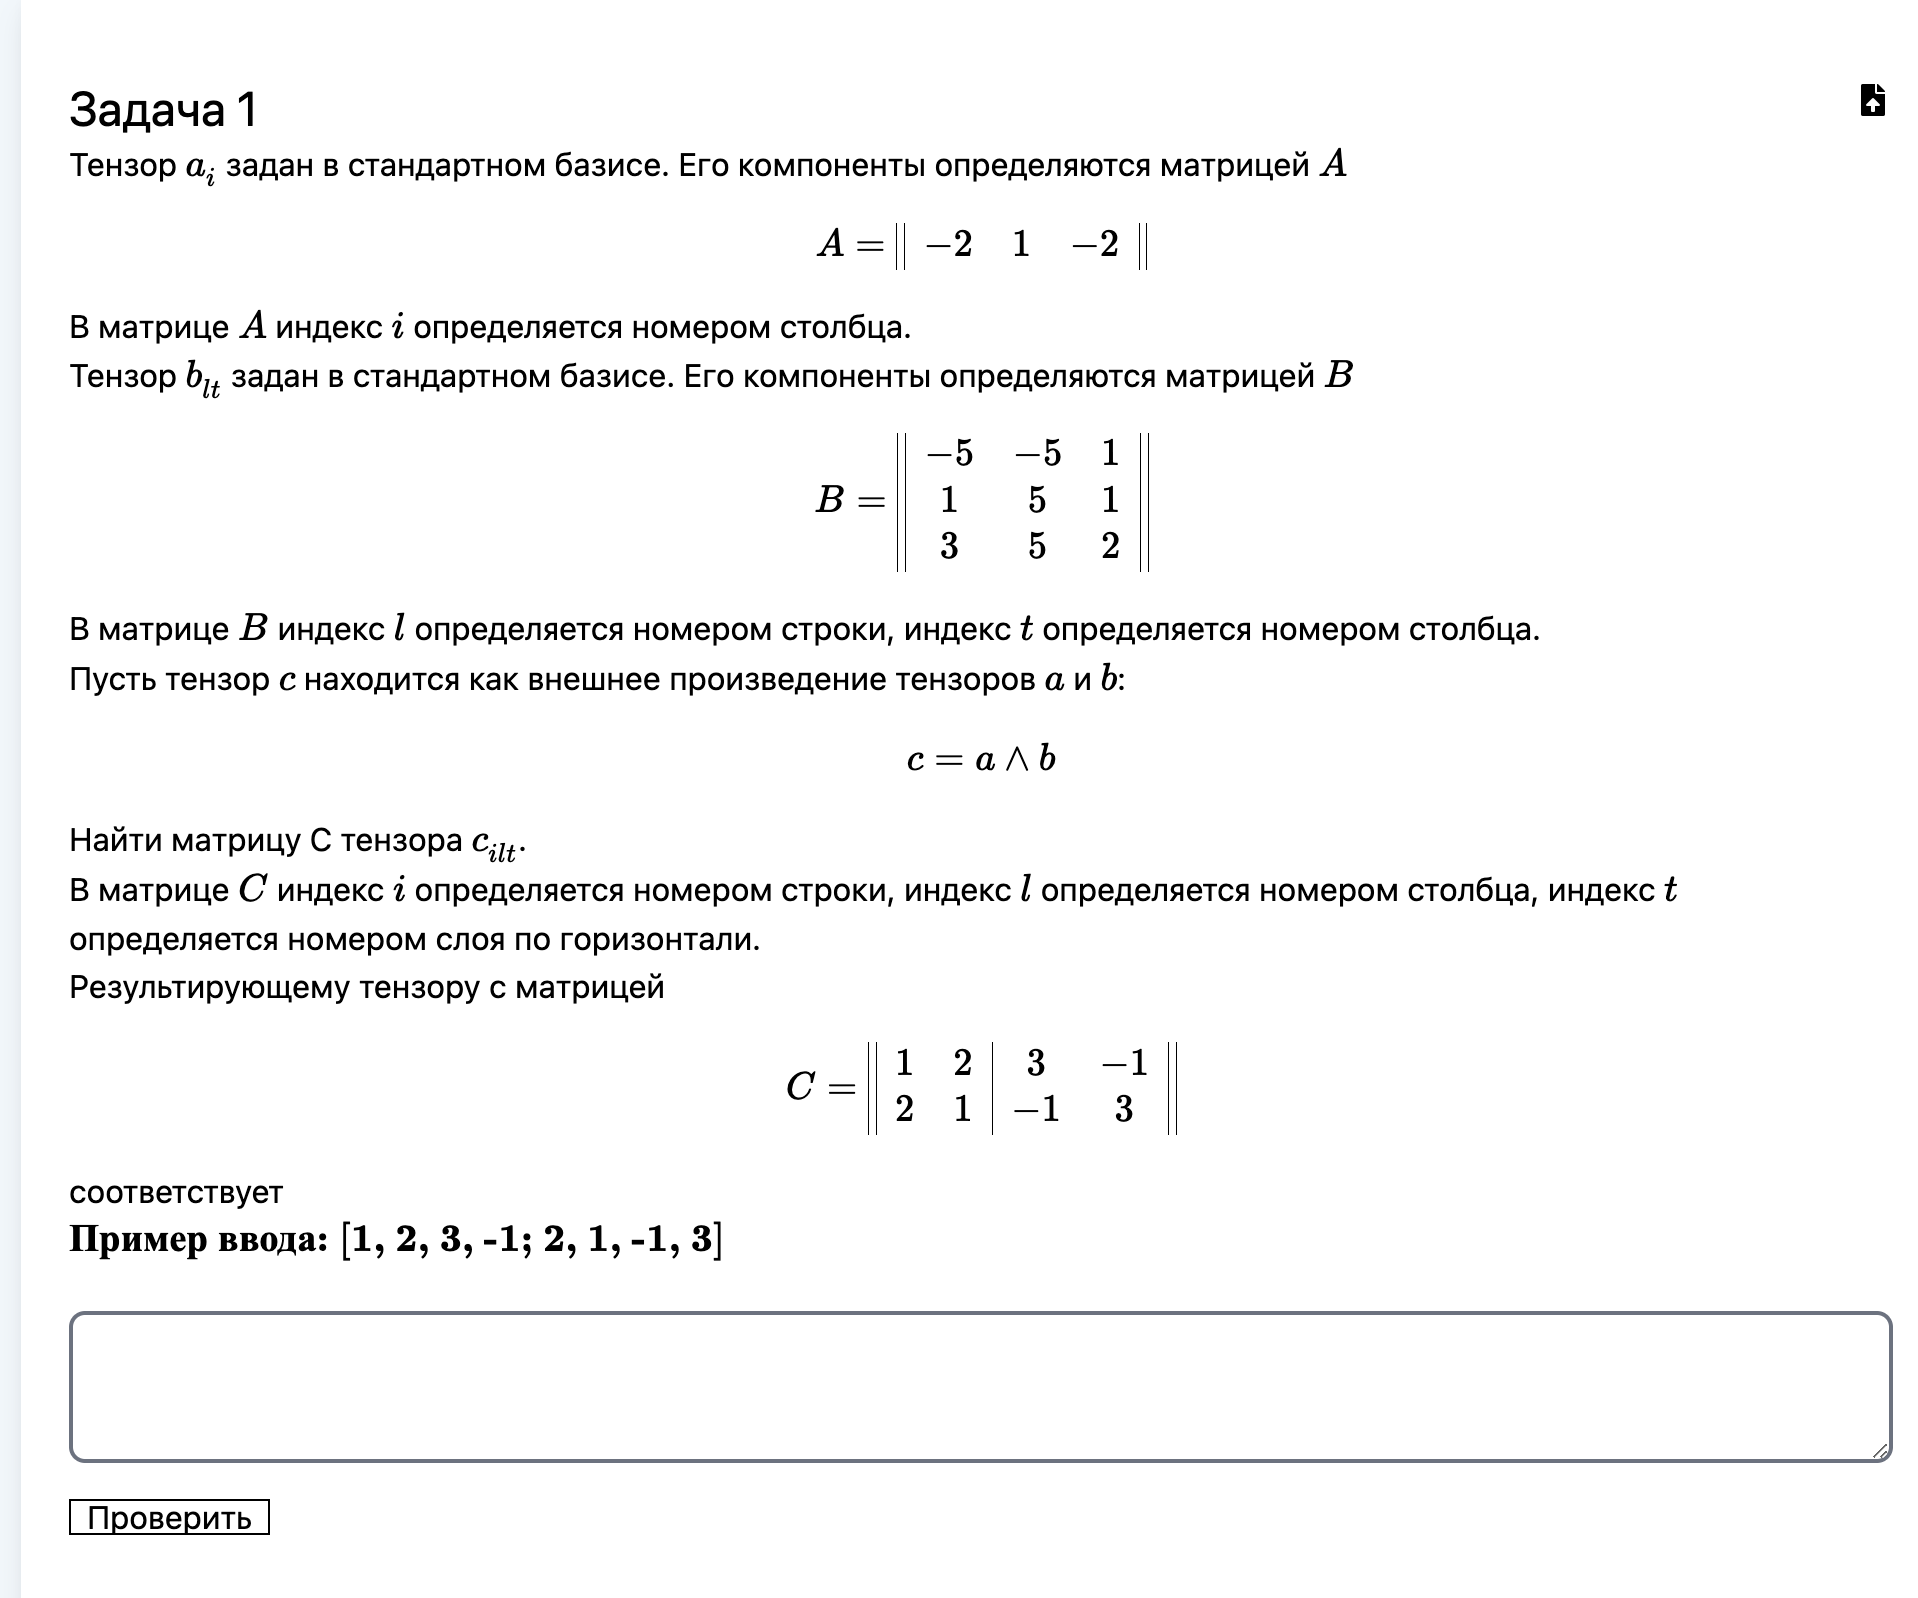

In [5]:
def mult(A: NDArray, B: NDArray) -> NDArray:
    # A - row, B - matrix (2,0)
    C_ilt = np.array([[[10, -2, -6], [-5, 1, 3], [10, -2, -6]], [[10, -10, -10], [-5, 5, 5], [10, -10, -10]], [[-2, -2, -4], [1, 1, 2], [-2, -2, -4]]])
    result = np.zeros_like(C_ilt)
    for k in range(3):
        for i in range(3):
            for j in range(3):
                result[k][i][j] = A[i] * B[j][k]
    return result

print(mult(np.array([-2, 1, -2]), np.array([[-5, -5, 1], [1, 5, 1], [3, 5, 2]])))

[[[ 10  -2  -6]
  [ -5   1   3]
  [ 10  -2  -6]]

 [[ 10 -10 -10]
  [ -5   5   5]
  [ 10 -10 -10]]

 [[ -2  -2  -4]
  [  1   1   2]
  [ -2  -2  -4]]]


In [6]:
def asymmetrisation(C_ilt: NDArray) -> NDArray:
#     C_ilt = np.array([[[10, -2, -6], [-5, 1, 3], [10, -2, -6]], [[10, -10, -10], [-5, 5, 5], [10, -10, -10]], [[-2, -2, -4], [1, 1, 2], [-2, -2, -4]]])

    C_lti = np.zeros_like(C_ilt)
    for t in range(3):
        for i in range(3):
            for l in range(3):
                C_lti[t][i][l] = C_ilt[i][l][t]

    C_til = np.zeros_like(C_ilt)
    for t in range(3):
        for i in range(3):
            for l in range(3):
                C_til[t][i][l] = C_ilt[l][t][i]

    C_itl = np.zeros_like(C_ilt)
    for t in range(3):
        for i in range(3):
            for l in range(3):
                C_itl[t][i][l] = C_ilt[l][i][t]

    C_tli = np.zeros_like(C_ilt)
    for t in range(3):
        for i in range(3):
            for l in range(3):
                C_tli[t][i][l] = C_ilt[i][t][l]

    C_lit = np.zeros_like(C_ilt)
    for t in range(3):
        for i in range(3):
            for l in range(3):
                C_lit[t][i][l] = C_ilt[t][l][i]

    return 1/2 * (C_ilt + C_lti + C_til - C_itl - C_tli - C_lit)
    # [0, 0, 0, 0, 0, -66, 0, 66, 0; 0, 0, 66, 0, 0, 0, -66, 0, 0; 0, -66, 0, 66, 0, 0, 0, 0, 0]
asymmetrisation(np.array([[[10, -2, -6], [-5, 1, 3], [10, -2, -6]], [[10, -10, -10], [-5, 5, 5], [10, -10, -10]], [[-2, -2, -4], [1, 1, 2], [-2, -2, -4]]]))

array([[[  0.,   0.,   0.],
        [  0.,   0.,  11.],
        [  0., -11.,   0.]],

       [[  0.,   0., -11.],
        [  0.,   0.,   0.],
        [ 11.,   0.,   0.]],

       [[  0.,  11.,   0.],
        [-11.,   0.,   0.],
        [  0.,   0.,   0.]]])

In [7]:
def first_task_solver(row_vector: NDArray, matrix: NDArray) -> NDArray:
    def stringify_geolin(A: NDArray):
        result = "["
        for d in range(3):
            for j in range(3):
                for p in range(3):
                    result += str(A[j][d][p])
                    if p != 2:
                        result += ', '
                if j != 2:
                    result += ', '
            if d != 2:
                result += "; "
        result += "]"
        return result
    tmp = mult(row_vector, matrix)
    return stringify_geolin(asymmetrisation(tmp))

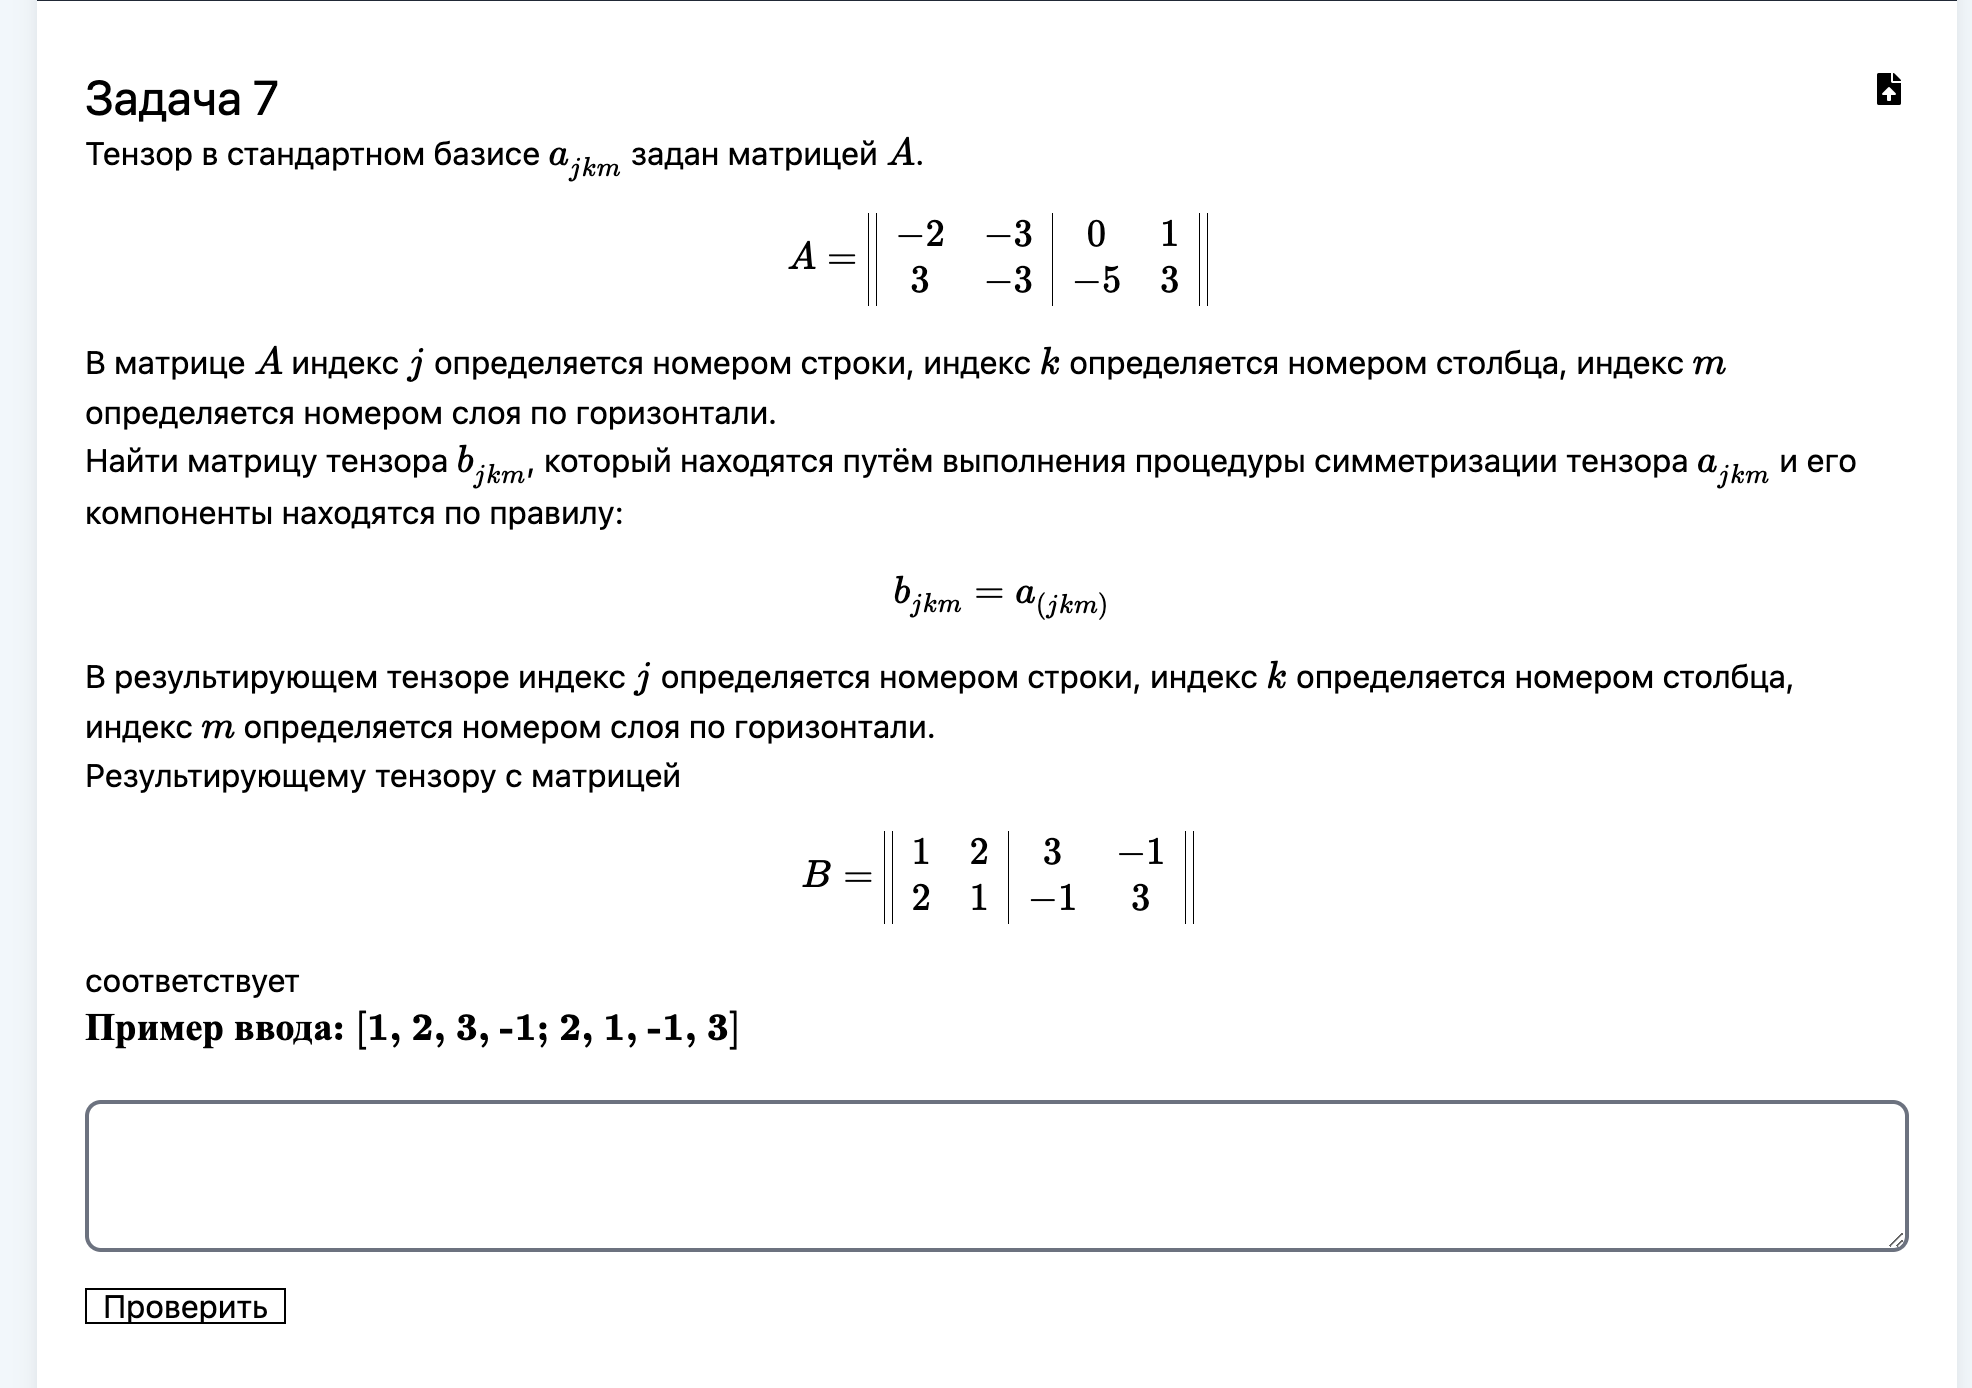

$${\normalsize \frac{1}{S!} \text{ where } S \text{ - index quantity}}$$

$${\normalsize \text{Sym}(a_{jkm}) = \frac{1}{3!} \sum_{\sigma \in \sigma_{M}} A}$$

In [13]:
def symmetrisation(C_ilt: NDArray) -> NDArray:
#     C_ilt = np.array([[[10, -2, -6], [-5, 1, 3], [10, -2, -6]], [[10, -10, -10], [-5, 5, 5], [10, -10, -10]], [[-2, -2, -4], [1, 1, 2], [-2, -2, -4]]])

    C_lti = np.zeros_like(C_ilt)
    for t in range(2):
        for i in range(2):
            for l in range(2):
                C_lti[t][i][l] = C_ilt[i][l][t]

    C_til = np.zeros_like(C_ilt)
    for t in range(2):
        for i in range(2):
            for l in range(2):
                C_til[t][i][l] = C_ilt[l][t][i]

    C_itl = np.zeros_like(C_ilt)
    for t in range(2):
        for i in range(2):
            for l in range(2):
                C_itl[t][i][l] = C_ilt[l][i][t]

    C_tli = np.zeros_like(C_ilt)
    for t in range(2):
        for i in range(2):
            for l in range(2):
                C_tli[t][i][l] = C_ilt[i][t][l]

    C_lit = np.zeros_like(C_ilt)
    for t in range(2):
        for i in range(2):
            for l in range(2):
                C_lit[t][i][l] = C_ilt[t][l][i]

    return 1/6 * (C_ilt + C_lti + C_til + C_itl + C_tli + C_lit)

In [15]:
A = np.array([[[-2, -3], [3, -3]], [[0, 1], [-5, 3]]])
symmetrisation(A)

array([[[-2.        ,  0.        ],
        [ 0.        , -2.33333333]],

       [[ 0.        , -2.33333333],
        [-2.33333333,  3.        ]]])

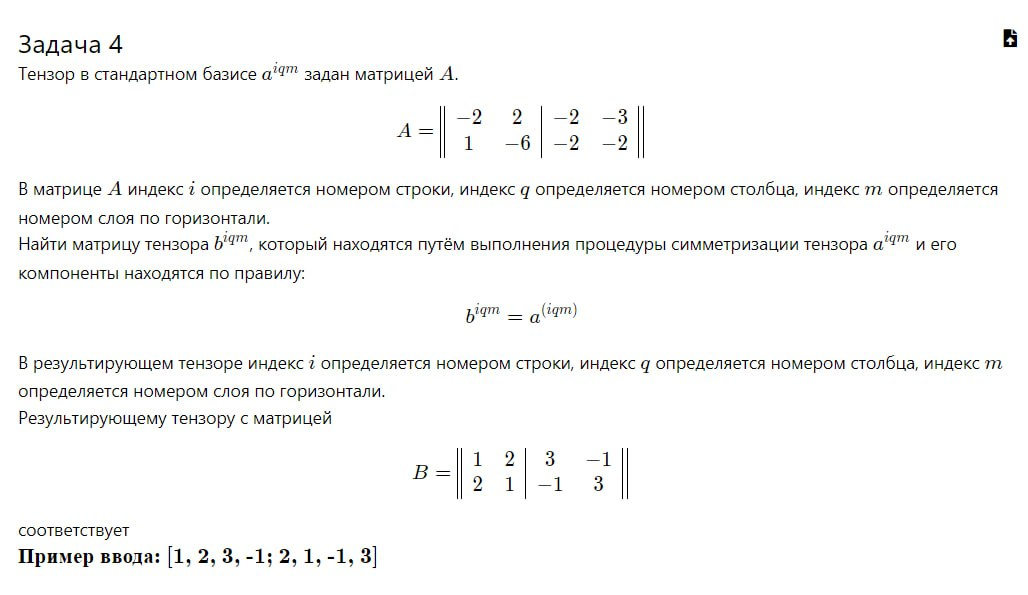

In [16]:
B = np.array([[[-2, 2], [1, -6]], [[-2, -3], [-2, -2]]])
symmetrisation(B)
# [-2, 0.3333, 0.3333, -3.66667; 0.3333, -3.6667, -3.6668, -2]

array([[[-2.        ,  0.33333333],
        [ 0.33333333, -3.66666667]],

       [[ 0.33333333, -3.66666667],
        [-3.66666667, -2.        ]]])

$${\normalsize c = a \wedge b \leftrightarrow c = \frac{(p + r)!}{p!\,r!}\,\text{Asym}(A \otimes B)}$$

In [ ]:
def perm_oddity(x: tuple) -> str:
    oddity = 0
    for i in range(len(x) - 1):
        if x[i] > x[i + 1]:
            oddity += 1
    return "+" if oddity % 2 == 0 else "-"

perms = list(permutations((1, 2, 3)))
for perm in perms:
    print(perm, perm_oddity(perm))

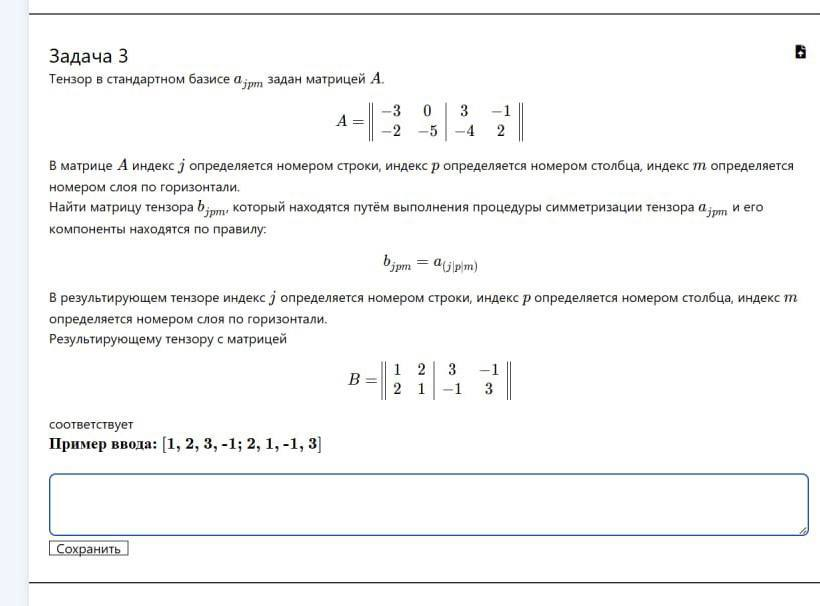

In [ ]:
def symmetrisation(C_ilt: NDArray) -> NDArray:
#     C_ilt = np.array([[[10, -2, -6], [-5, 1, 3], [10, -2, -6]], [[10, -10, -10], [-5, 5, 5], [10, -10, -10]], [[-2, -2, -4], [1, 1, 2], [-2, -2, -4]]])

    C_lti = np.zeros_like(C_ilt)
    for t in range(2):
        for i in range(2):
            for l in range(2):
                C_lti[t][i][l] = C_ilt[i][l][t]

    C_til = np.zeros_like(C_ilt)
    for t in range(2):
        for i in range(2):
            for l in range(2):
                C_til[t][i][l] = C_ilt[l][t][i]

    C_itl = np.zeros_like(C_ilt)
    for t in range(2):
        for i in range(2):
            for l in range(2):
                C_itl[t][i][l] = C_ilt[l][i][t]

    C_tli = np.zeros_like(C_ilt)
    for t in range(2):
        for i in range(2):
            for l in range(2):
                C_tli[t][i][l] = C_ilt[i][t][l]

    C_lit = np.zeros_like(C_ilt)
    for t in range(2):
        for i in range(2):
            for l in range(2):
                C_lit[t][i][l] = C_ilt[t][l][i]

    return 1/2 * (C_ilt + C_lti + C_til + C_itl + C_tli + C_lit)
    # [0, 0, 0, 0, 0, -66, 0, 66, 0; 0, 0, 66, 0, 0, 0, -66, 0, 0; 0, -66, 0, 66, 0, 0, 0, 0, 0]
print(symmetrisation(np.array([[[-3, 0], [-2, -5]], [[3, -1], [-4, 2]]])))

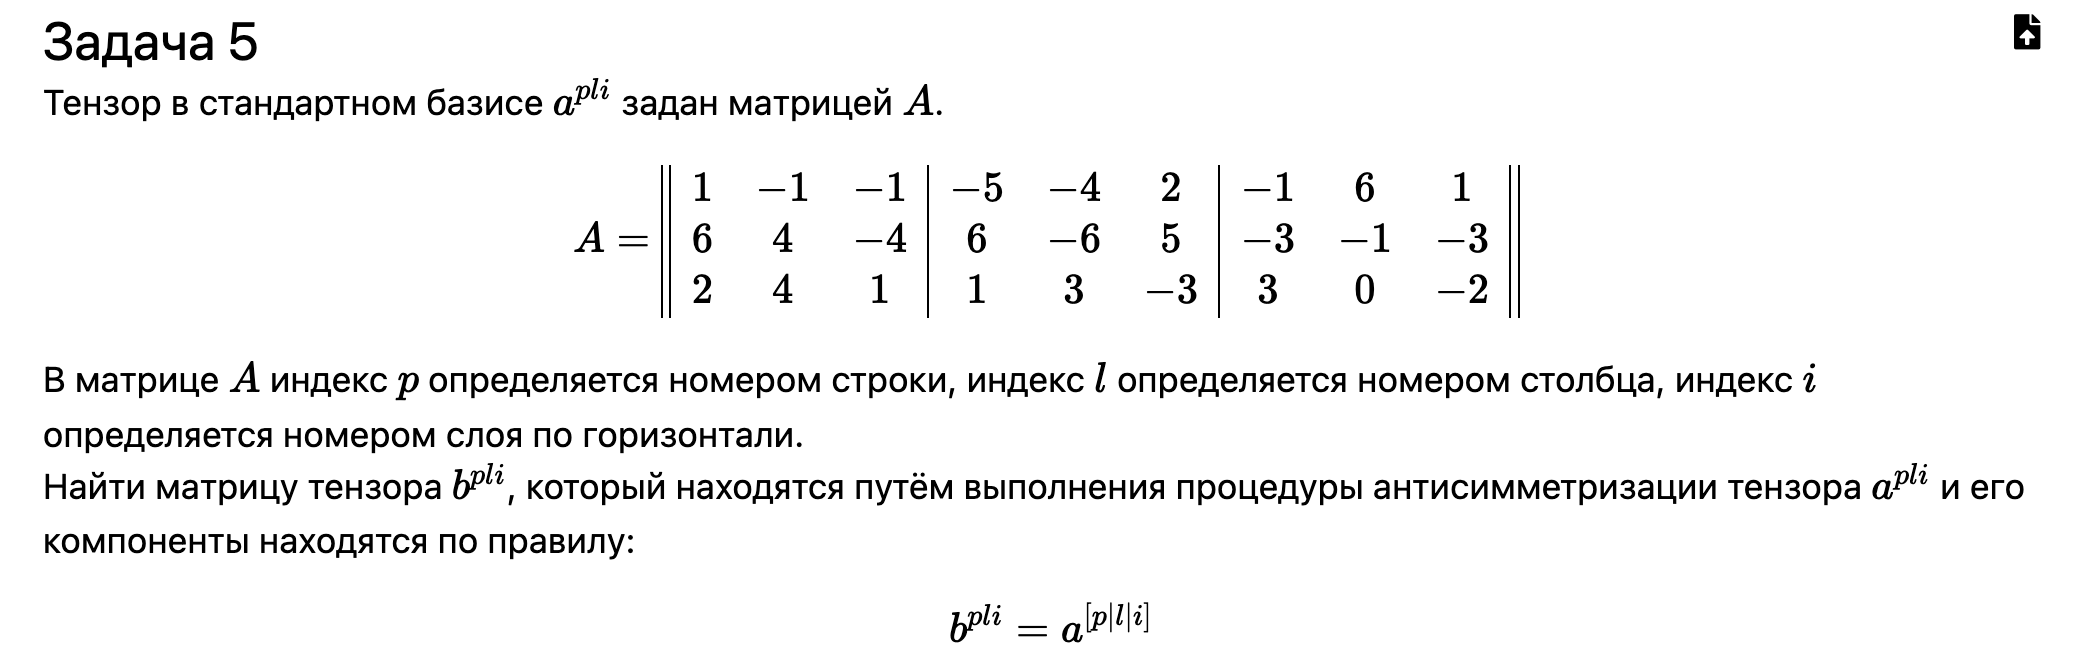

In [ ]:
A = np.array([[[1, -1, -1], [6, 4, -4], [2, 4, 1]], [[-5, -4, 2], [6, -6, 5], [1, 3, -3]], [[-1, 6, 1], [-3, -1, -3], [3, 0, -2]]])
B = np.zeros_like(A)
for i in range(3):
    for p in range(3):
        for l in range(3):
            B[i][p][l] = A[p][i][l]
1/2 * (A - B)
# [0, 0, 0, -5.5, -4, 3, -1.5, 1, 0; 5.5, 4, -3, 0, 0, 0, -2, -2, 0; 1.5, -1, 0, 2, 2, 0, 0, 0, 0]

<hr>

# Others

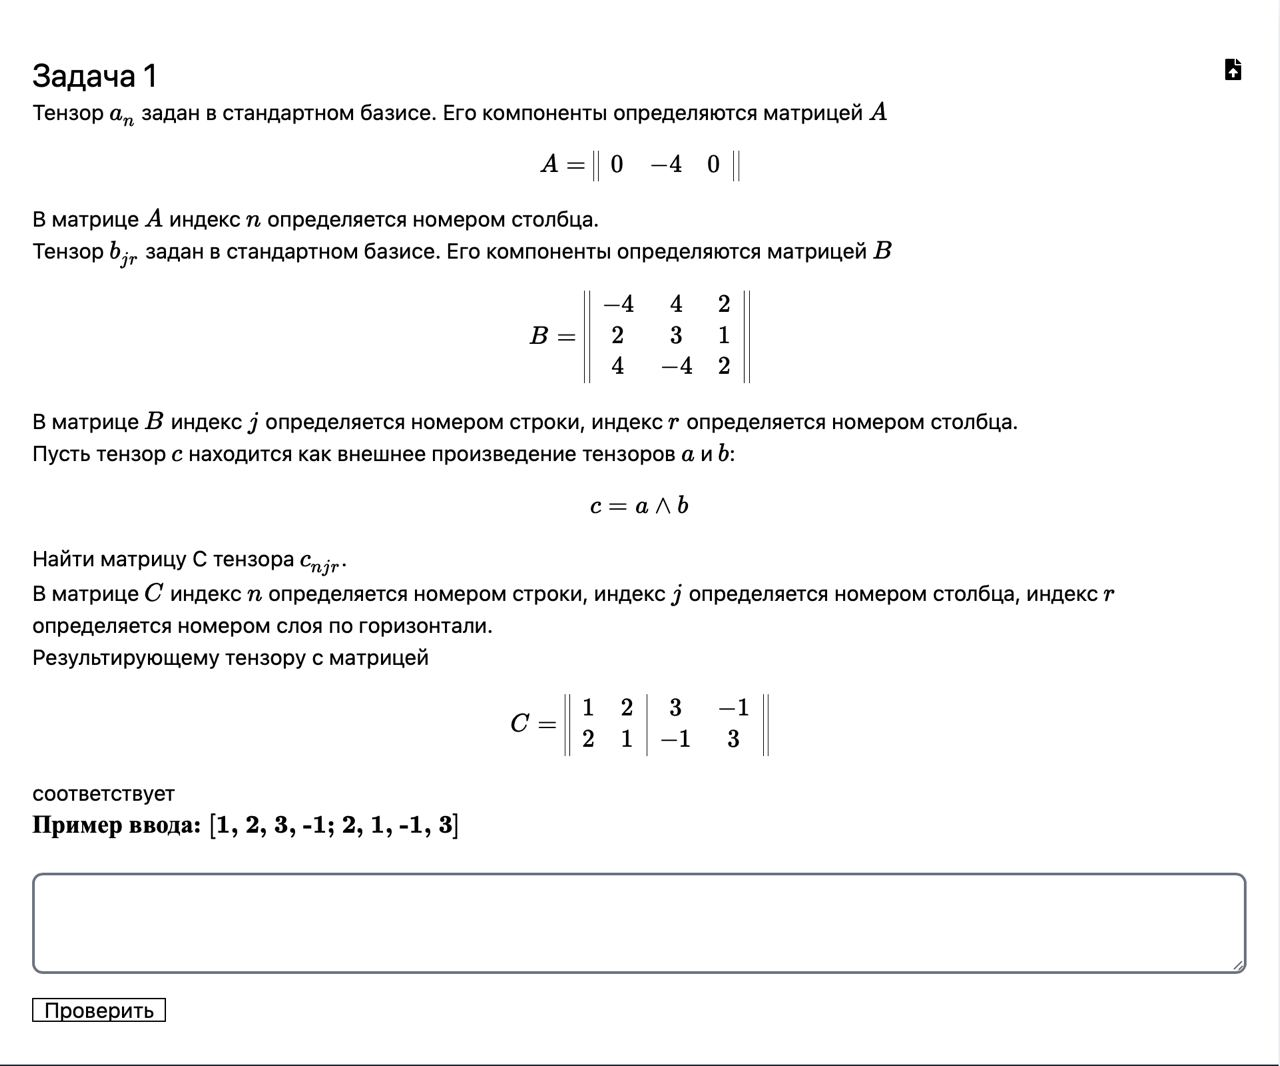

In [ ]:
first_task_solver(np.array([0, -4, 0]), np.array([[-4, 4, 2], [2, 3, 1], [4, -4, 2]]))

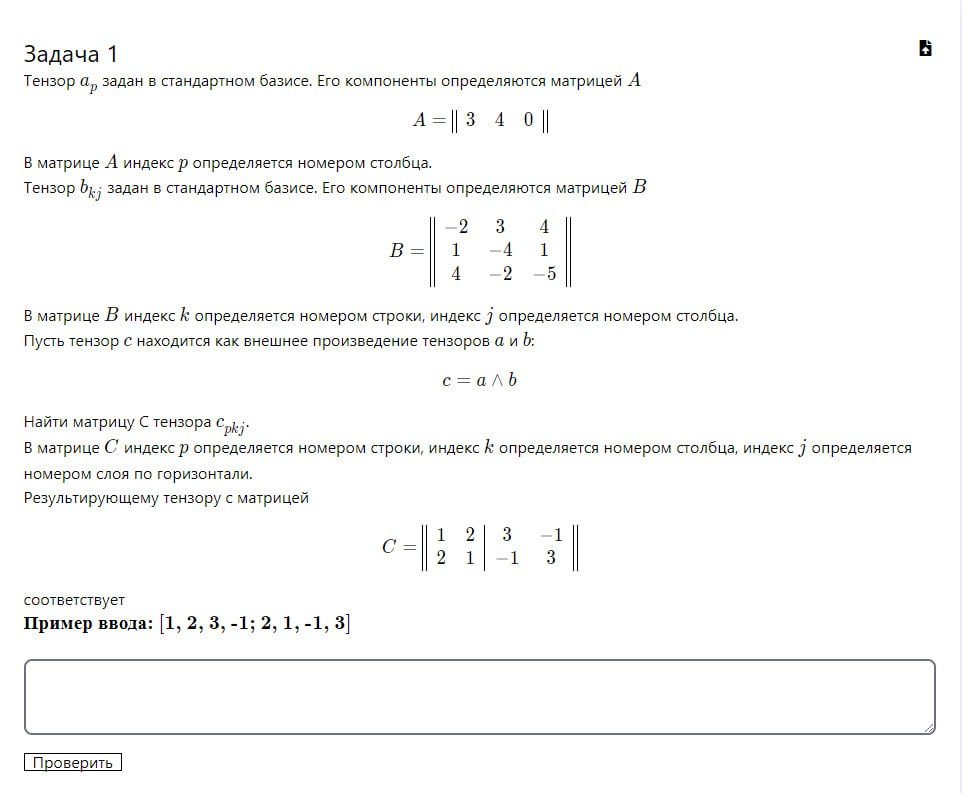

In [ ]:
first_task_solver(np.array([3, 4, 0]), np.array([[-2, 3, 4], [1, -4, 1], [4, -2, -5]]))

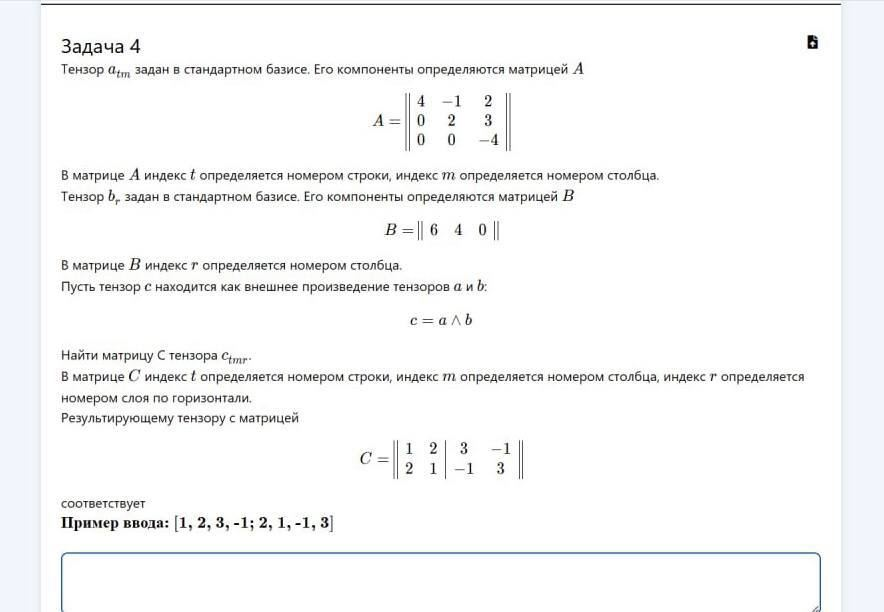

In [ ]:
first_task_solver(np.array([6, 4, 0]), np.array([[4, -1, 2], [0, 2, 3], [0, 0, -4]]))

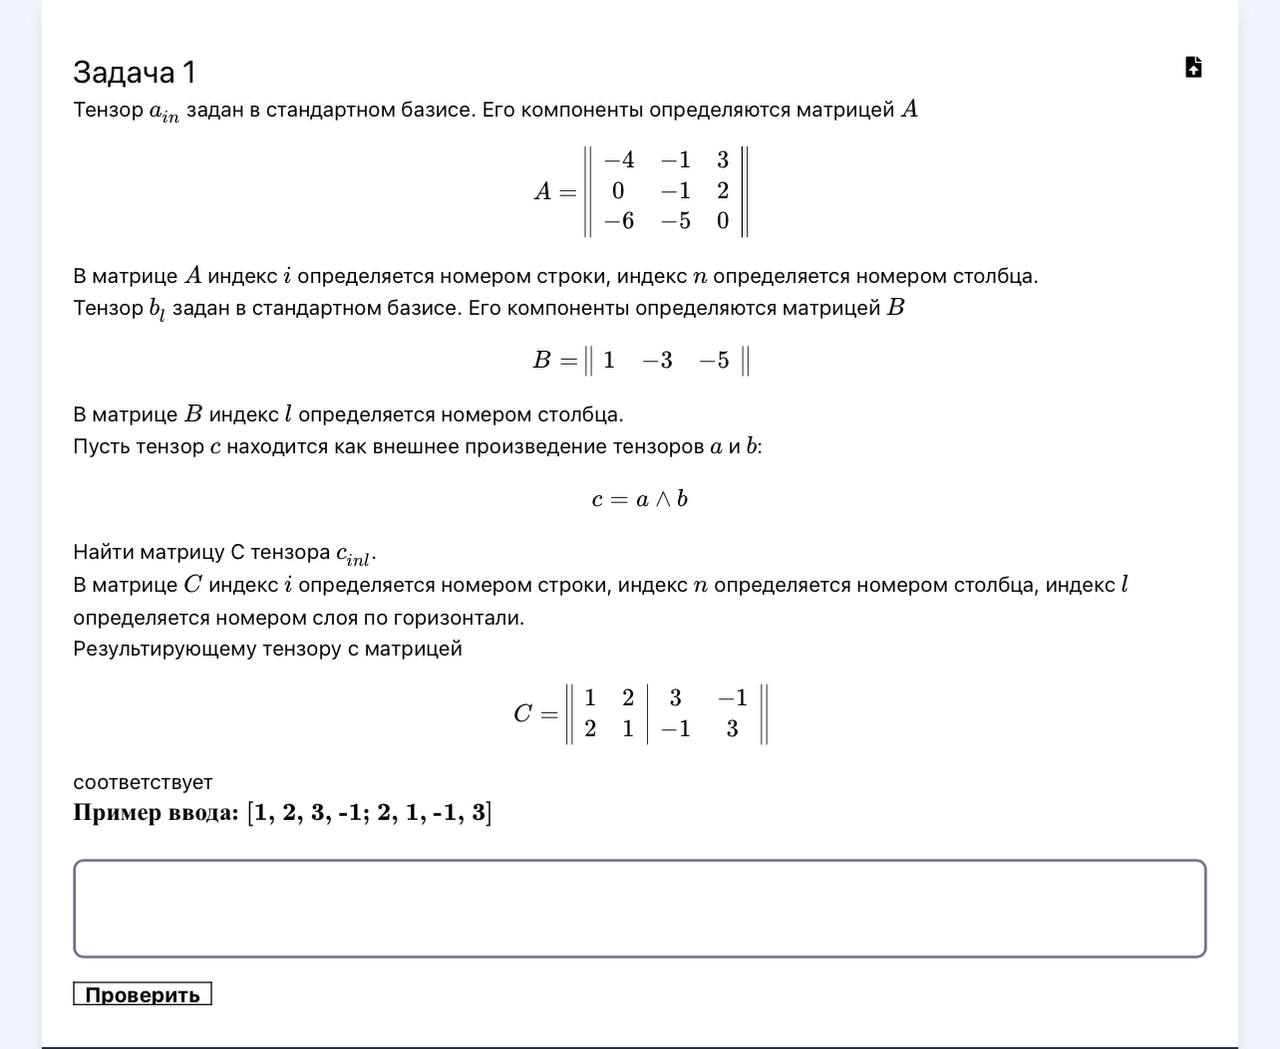

In [ ]:
first_task_solver(np.array([1, -3, -5]), np.array([[-4, -1, 3], [0, -1, 2], [-6, -5, 0]]))

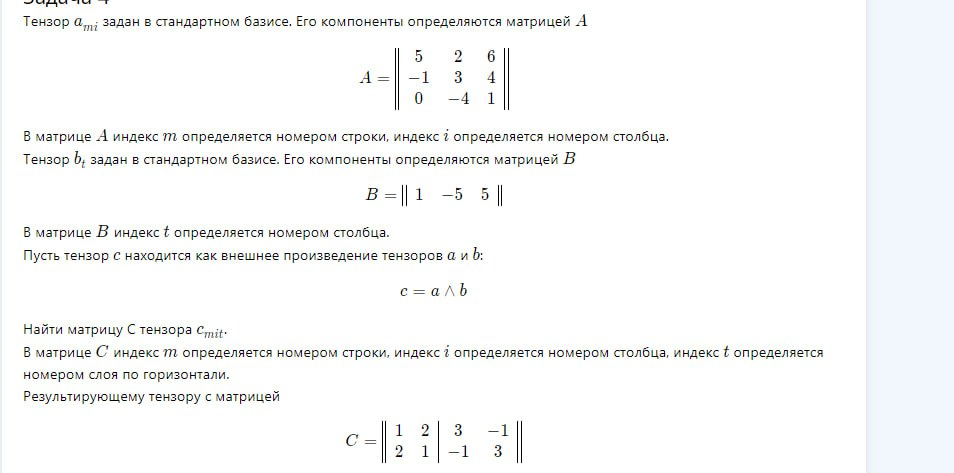

In [ ]:
first_task_solver(np.array([1, -5, 5]), np.array([[5, 2, 6], [-1, 3, 4], [0, -4, 1]]))

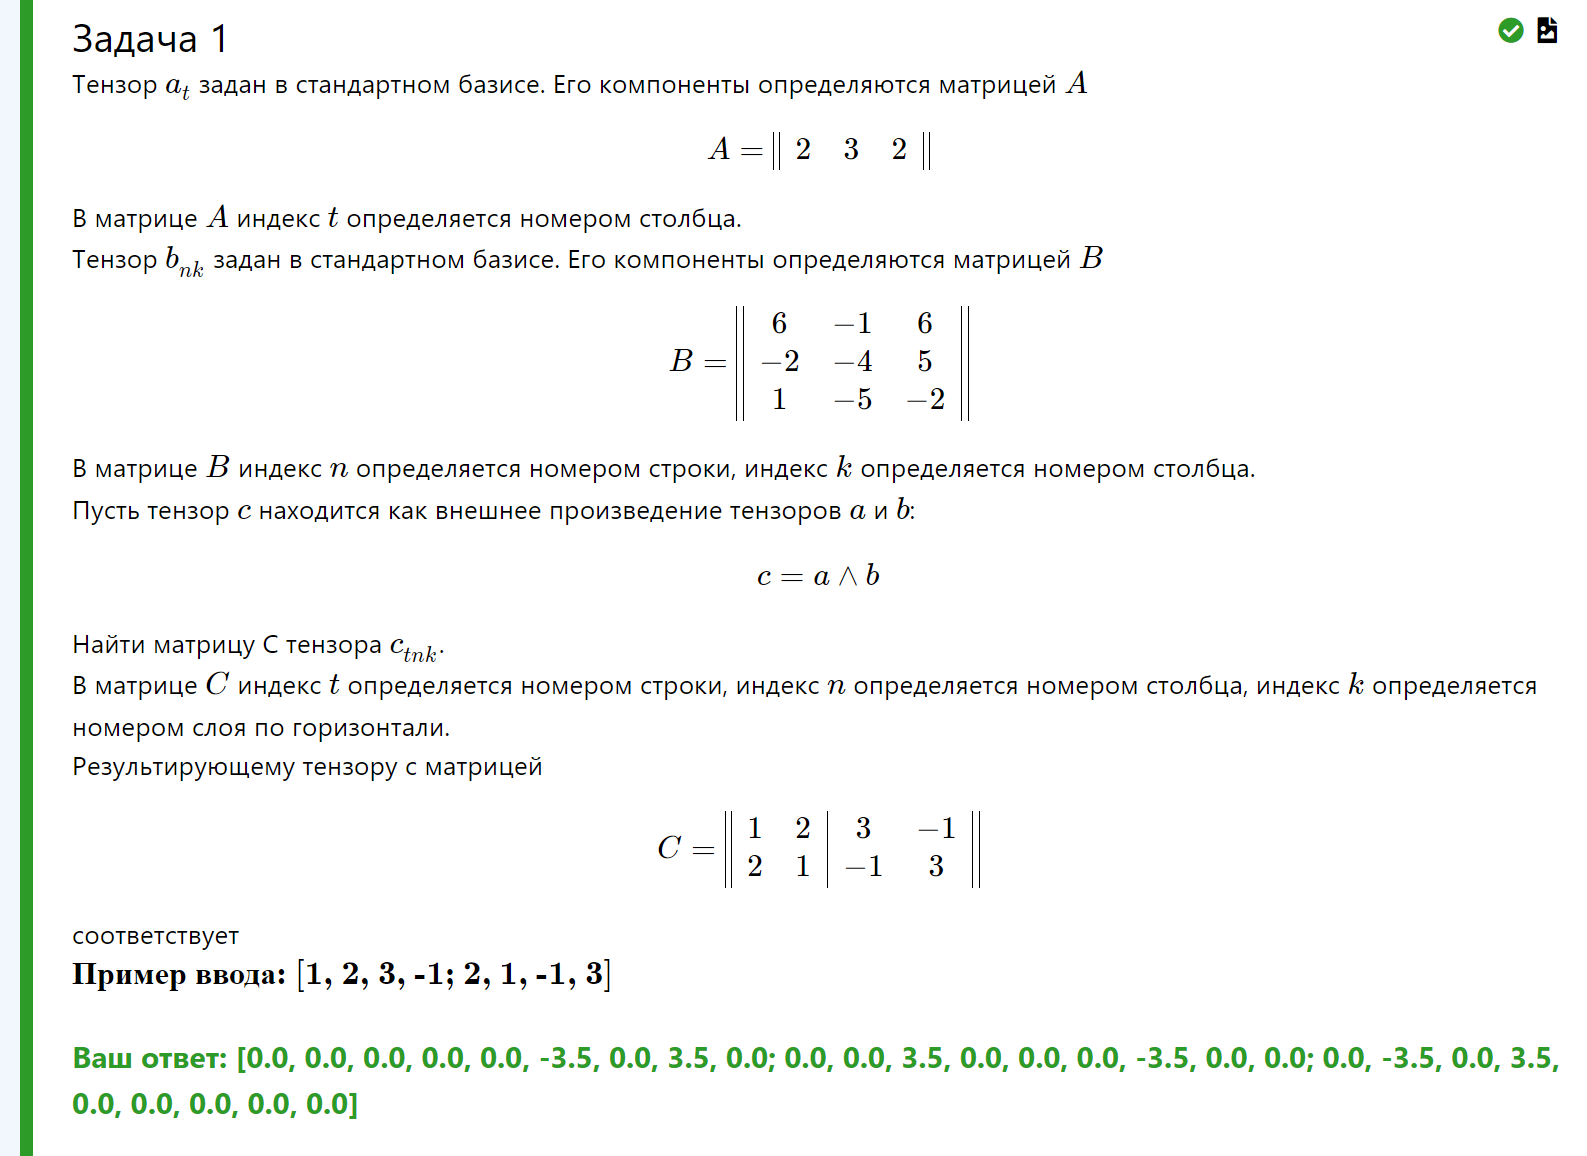

In [ ]:
first_task_solver(np.array([2, 3, 2]), np.array([[6, -1, 6], [-2, -4, 5], [1, -5, -2]]))

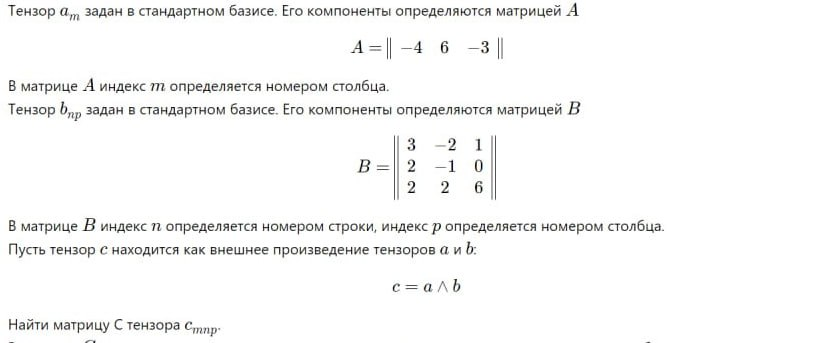

In [ ]:
first_task_solver(np.array([-4, 6, -3]), np.array([[3, -2, 1], [2, -1, 0], [2, 2, 6]]))

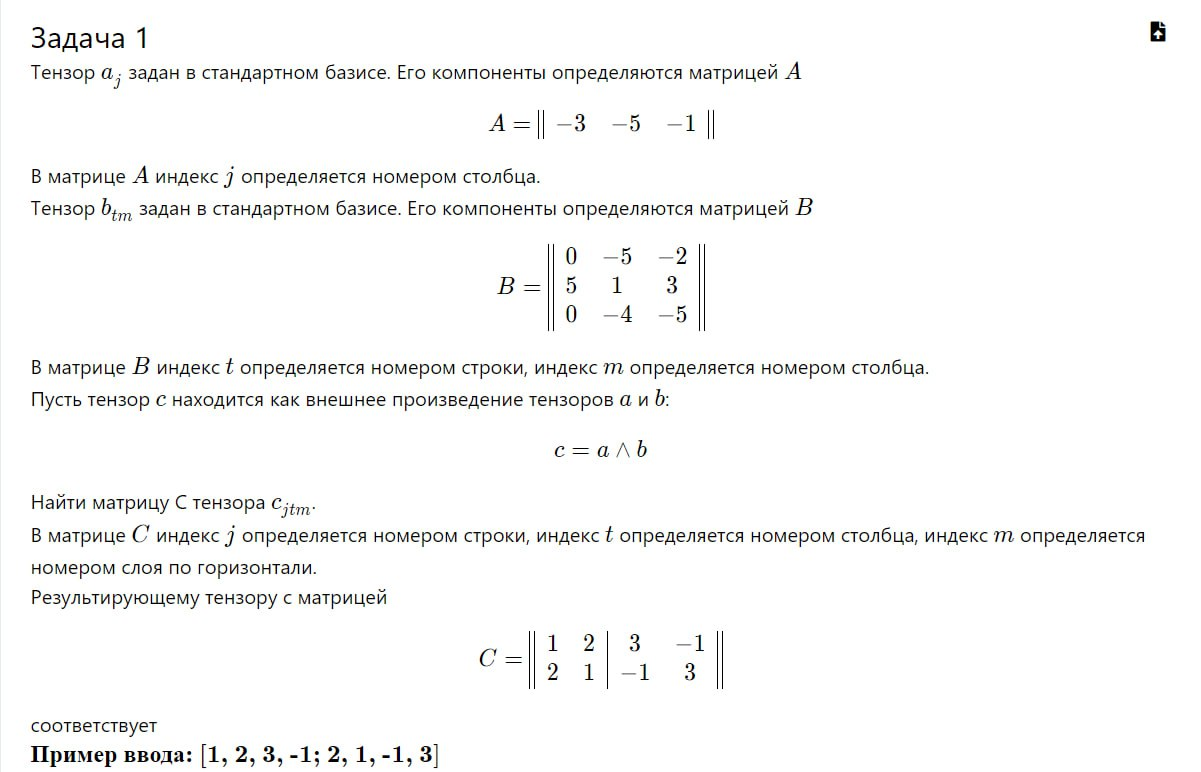

In [ ]:
first_task_solver(np.array([-3, -5, -1]), np.array([[0, -5, -2], [5, 1, 3], [0, -4, -5]]))

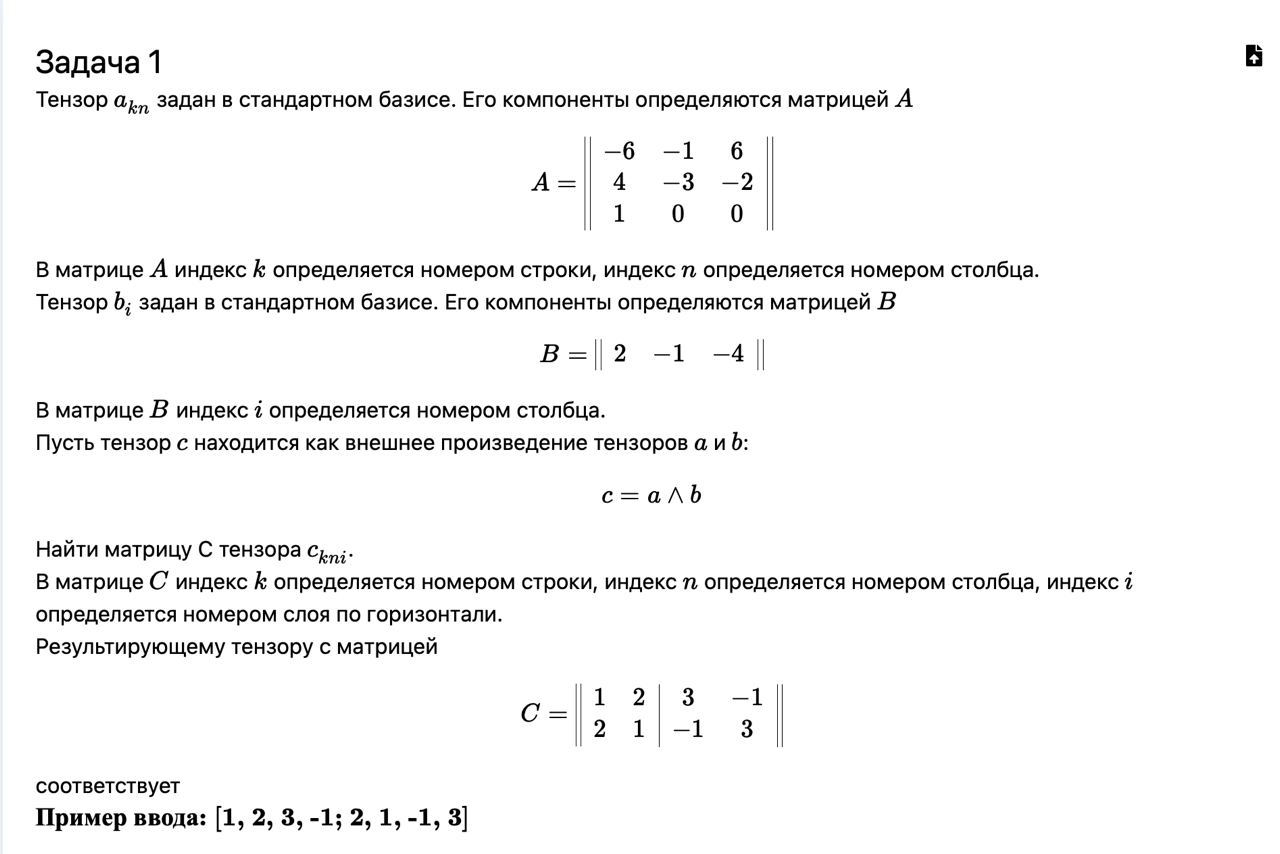

In [ ]:
first_task_solver(np.array([2, -1, -4]), np.array([[-6, -1, 6], [4, -3, -2], [1, 0, 0]]))

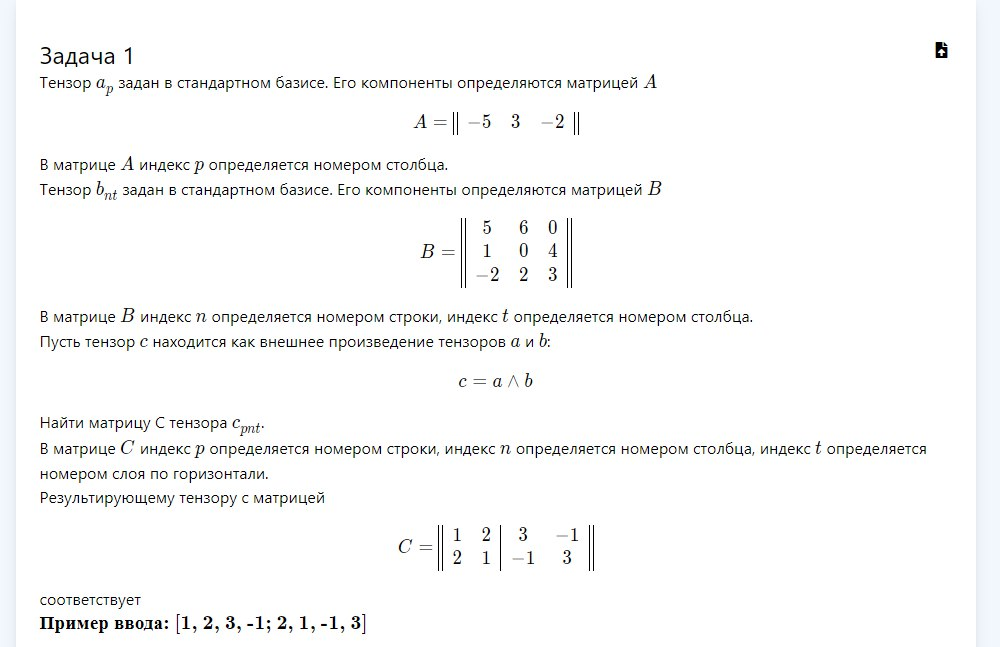

In [ ]:
first_task_solver(np.array([-5, 3, -2]), np.array([[5, 6, 0], [1, 0, 4], [-2, 2, 3]]))

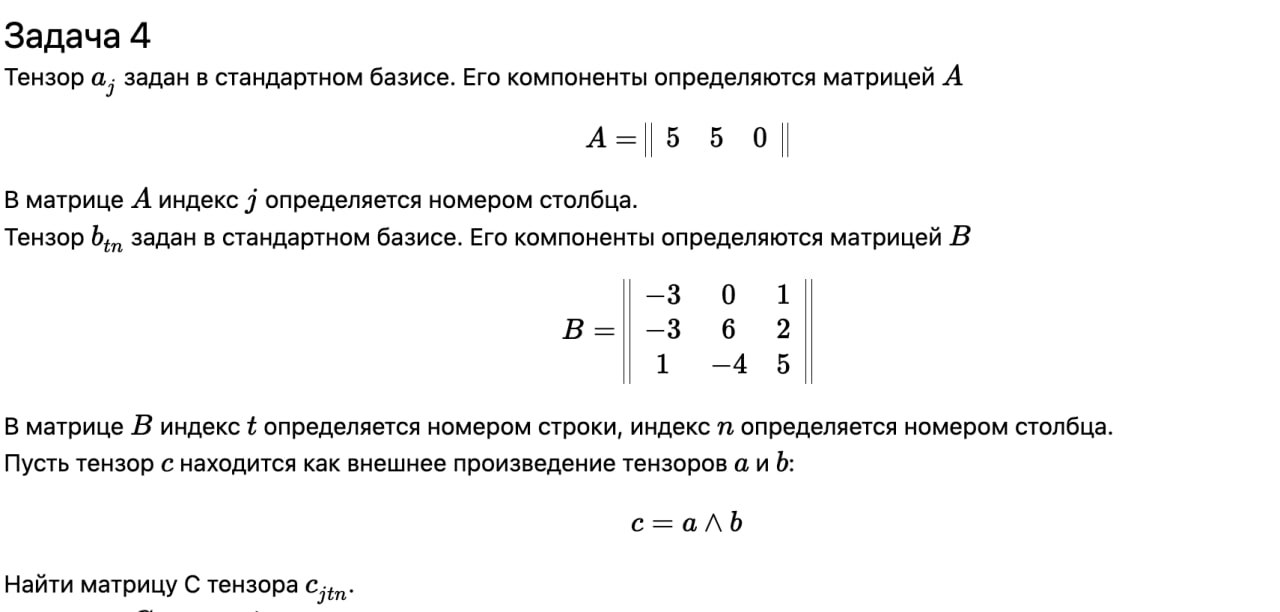

In [ ]:
first_task_solver(np.array([5, 5, 0]), np.array([[-3, 0, 1], [-3, 6, 2], [1, -4, 5]]))

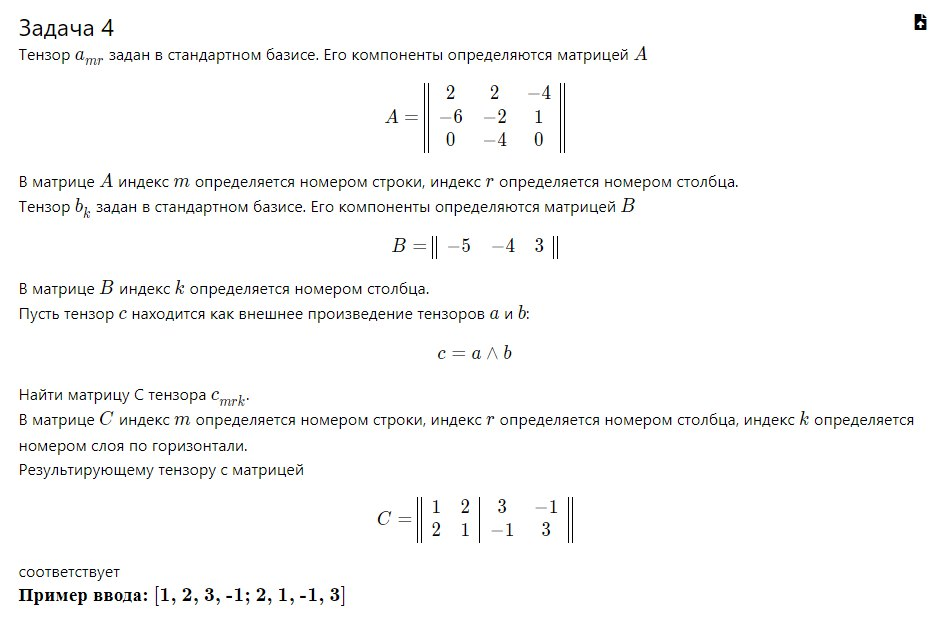

In [ ]:
first_task_solver(np.array([-5, -4, 3]), np.array([[2, 2, -4], [-6, -2, 1], [0, -4, 0]]))

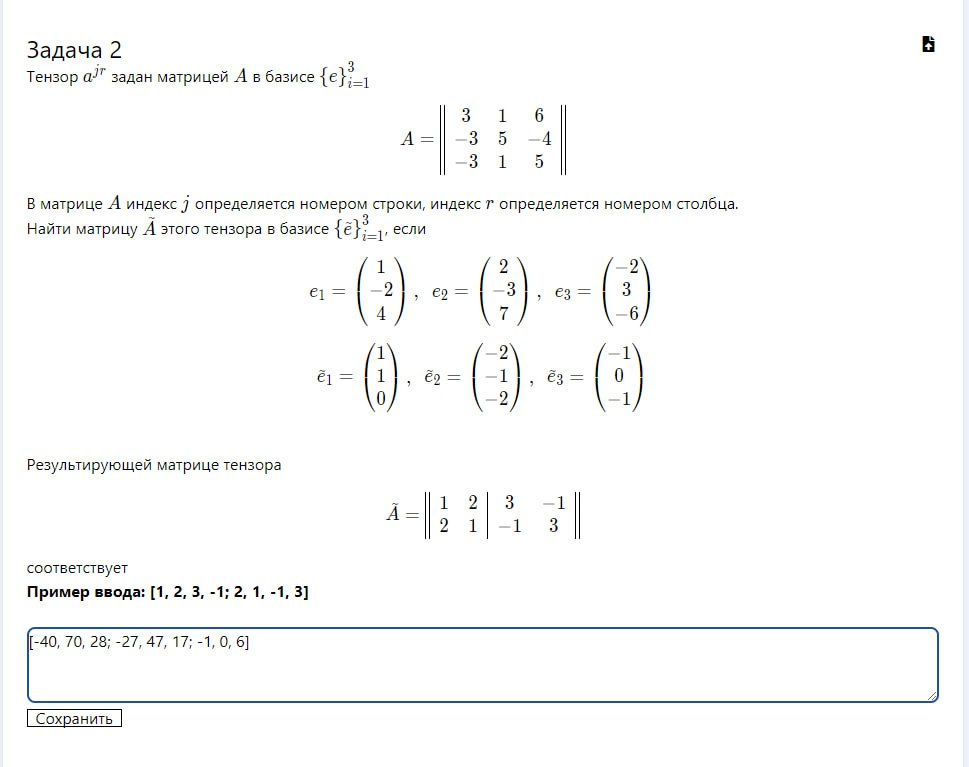

In [ ]:
A = np.array([[3, 1, 6], [-3, 5, -4], [-3, 1, 5]])
E = np.array([[1, 2, -2], [-2, -3, 3], [4, 7, -6]])
Enew = np.array([[1, -2, -1], [1, -1, 0], [0, -2, -1]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("jp, il, lp -> ij", S, S, A)

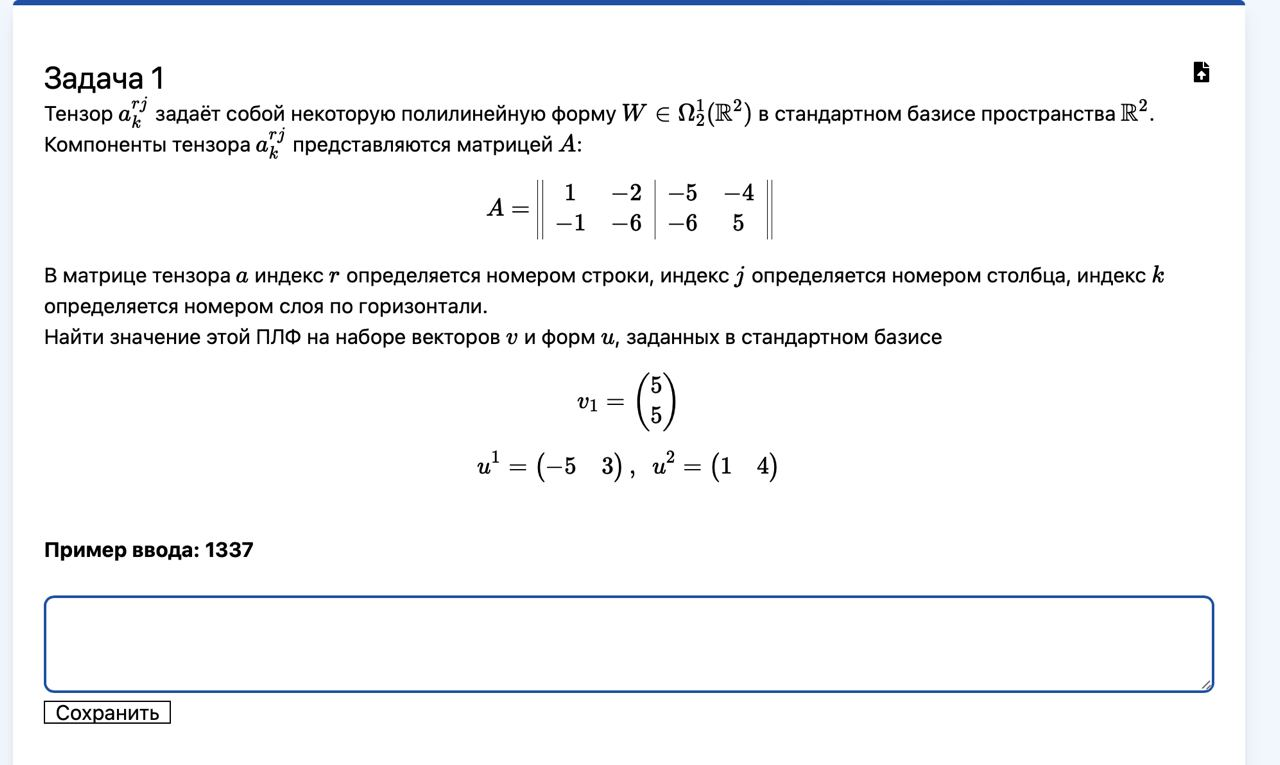

In [ ]:
A = np.array([[[1, -2], [-1, -6]], [[-5, -4], [-6, 5]]])

v1 = np.array([5, 5])

u1 = np.array([-5, 3])

u2 = np.array([1, 4])


c = 0

for k in range(2):
    for r in range(2):
        for j in range(2):
            c += A[k][r][j] * v1[k] * u1[r] * u2[j]
c

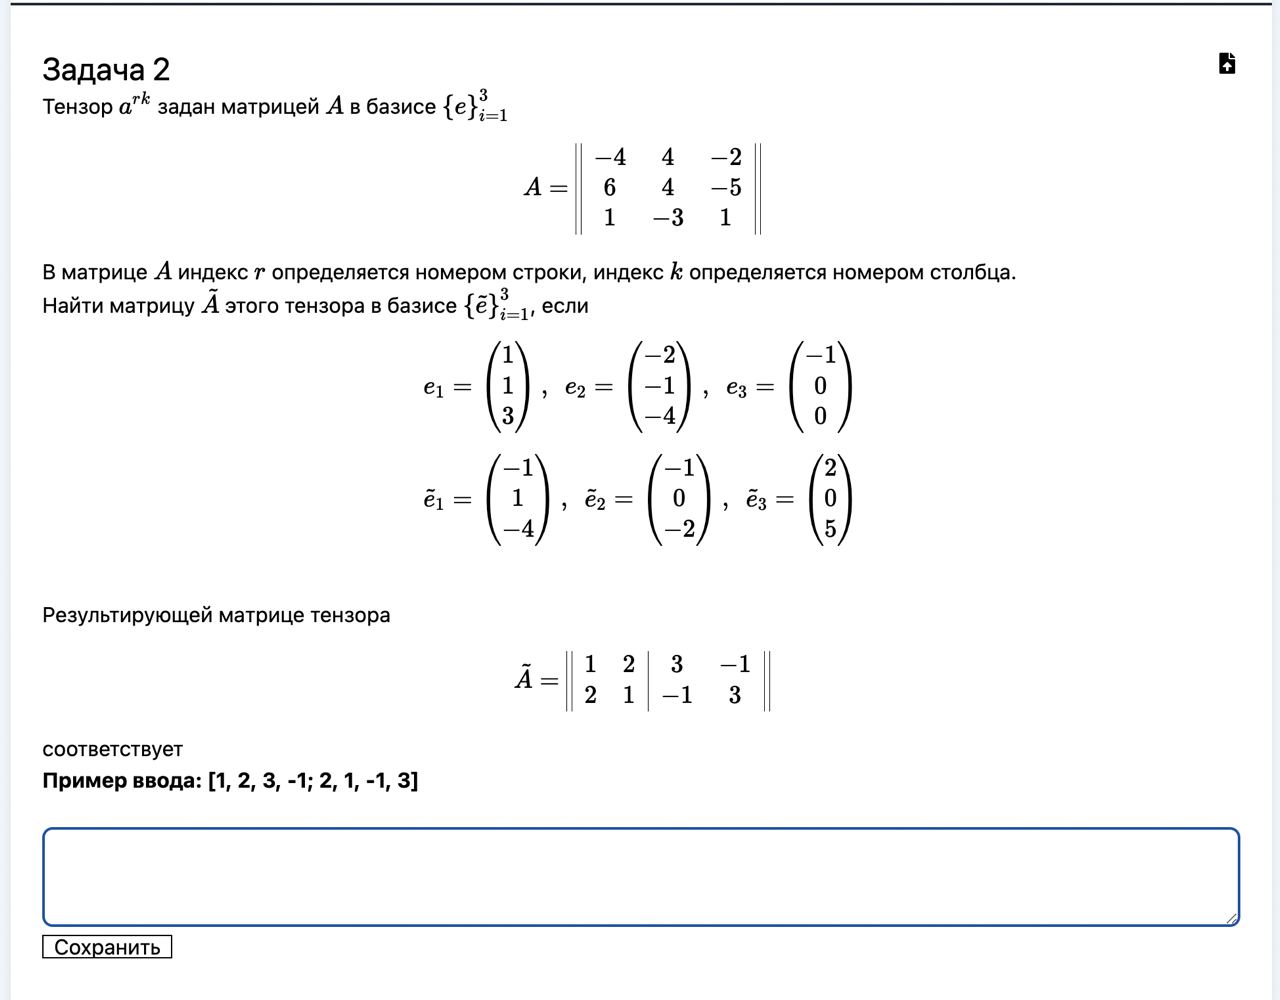

In [ ]:
A = np.array([[-4, 4, -2], [6, 4, -5], [1, -3, 1]])
E = np.array([[1, -2, -1], [1, -1, 0], [3, -4, 0]])
Enew = np.array([[-1, -1, 2], [1, 0, 0], [-4, -2, 5]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("jp, il, lp -> ij", S, S, A)

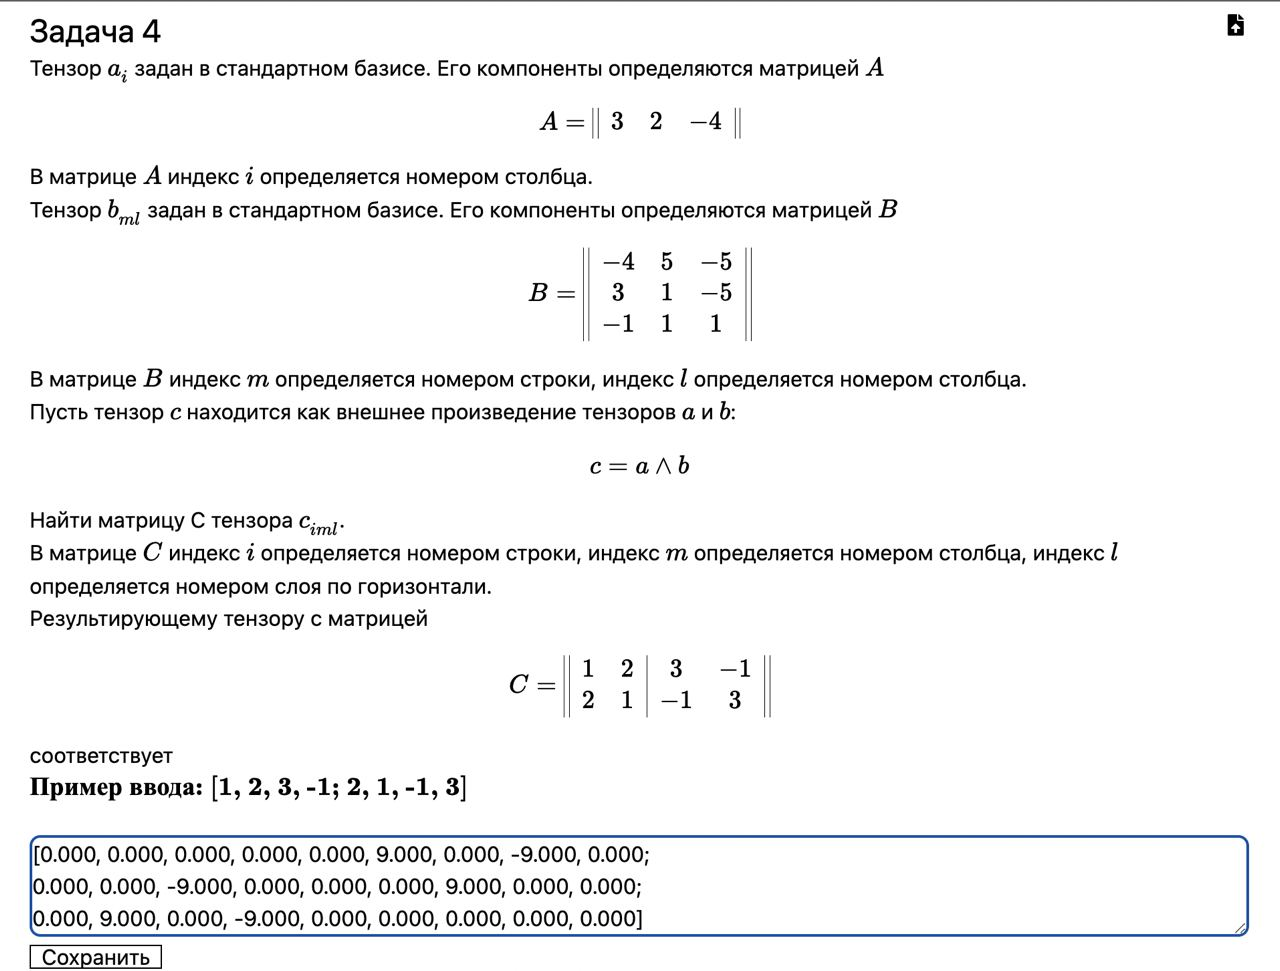

In [ ]:
first_task_solver(np.array([3, 2, -4]), np.array([[-4, 5, -5], [3, 1, -5], [-1, 1, 1]]))

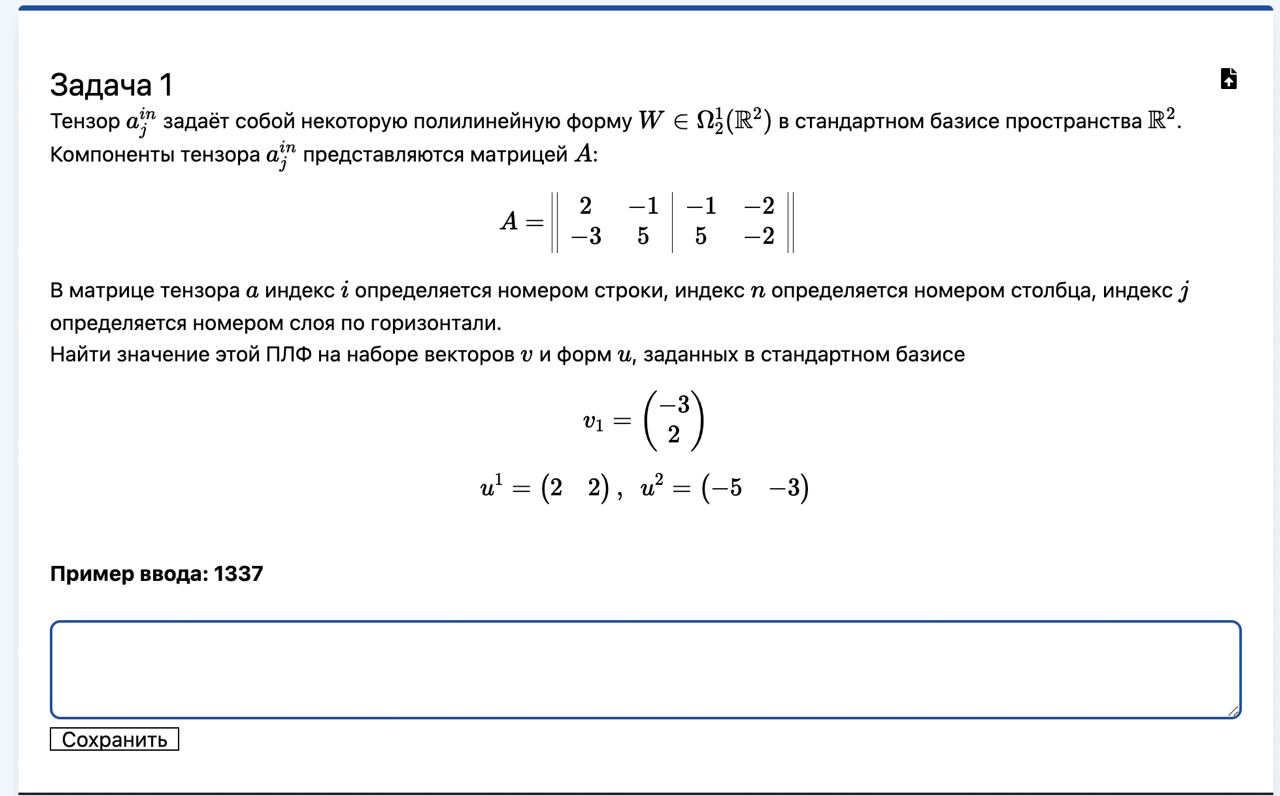

In [ ]:
A = np.array([[[2, -1], [-3, 5]], [[-1, -2], [5, -2]]])

v1 = np.array([-3, 2])

u1 = np.array([2, 2])

u2 = np.array([-5, -3])


c = 0

for j in range(2):
    for i in range(2):
        for n in range(2):
            c += A[j][i][n] * v1[j] * u1[i] * u2[n]
c

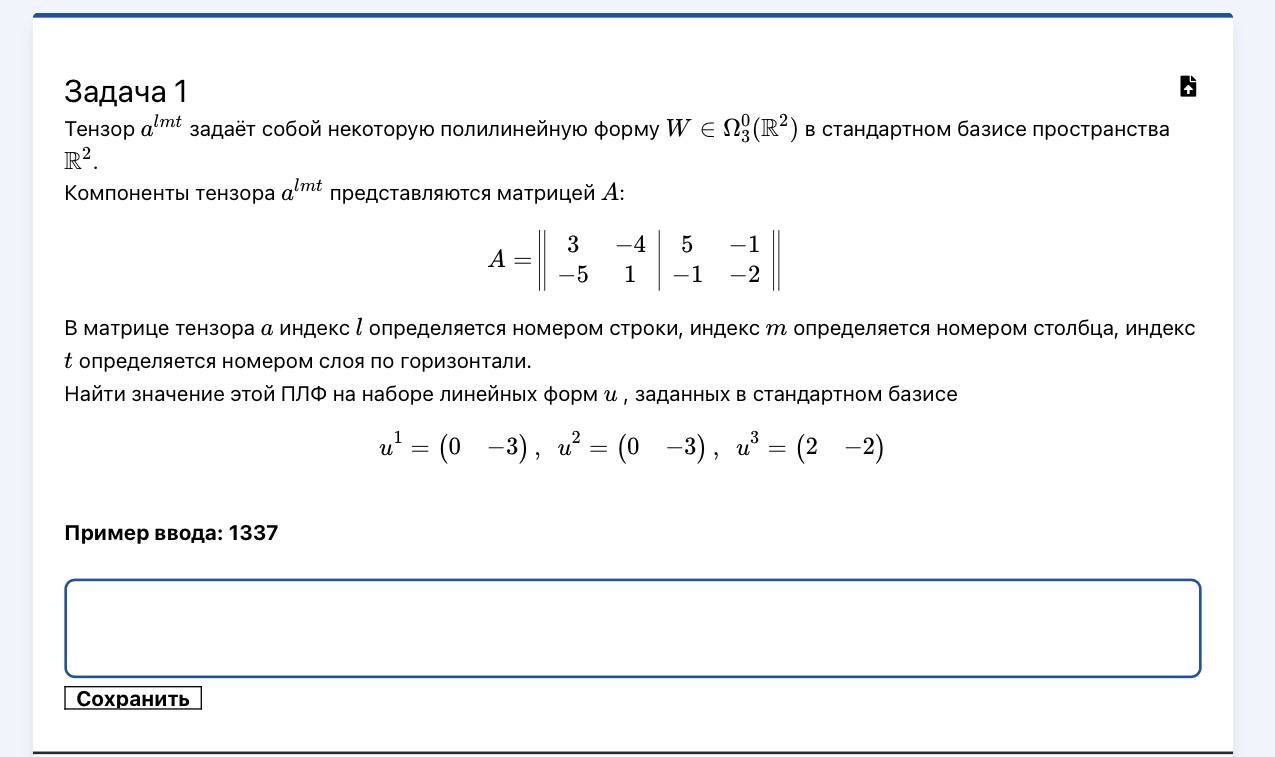

In [ ]:
A = np.array([[[3, -4], [-5, 1]], [[5, -1], [-1, -2]]])

u1 = np.array([0, -3])

u2 = np.array([0, -3])

u3 = np.array([2, -2])


c = 0

for t in range(2):
    for l in range(2):
        for m in range(2):
            c += A[t][l][m] * u1[m] * u2[t] * u3[l]
c

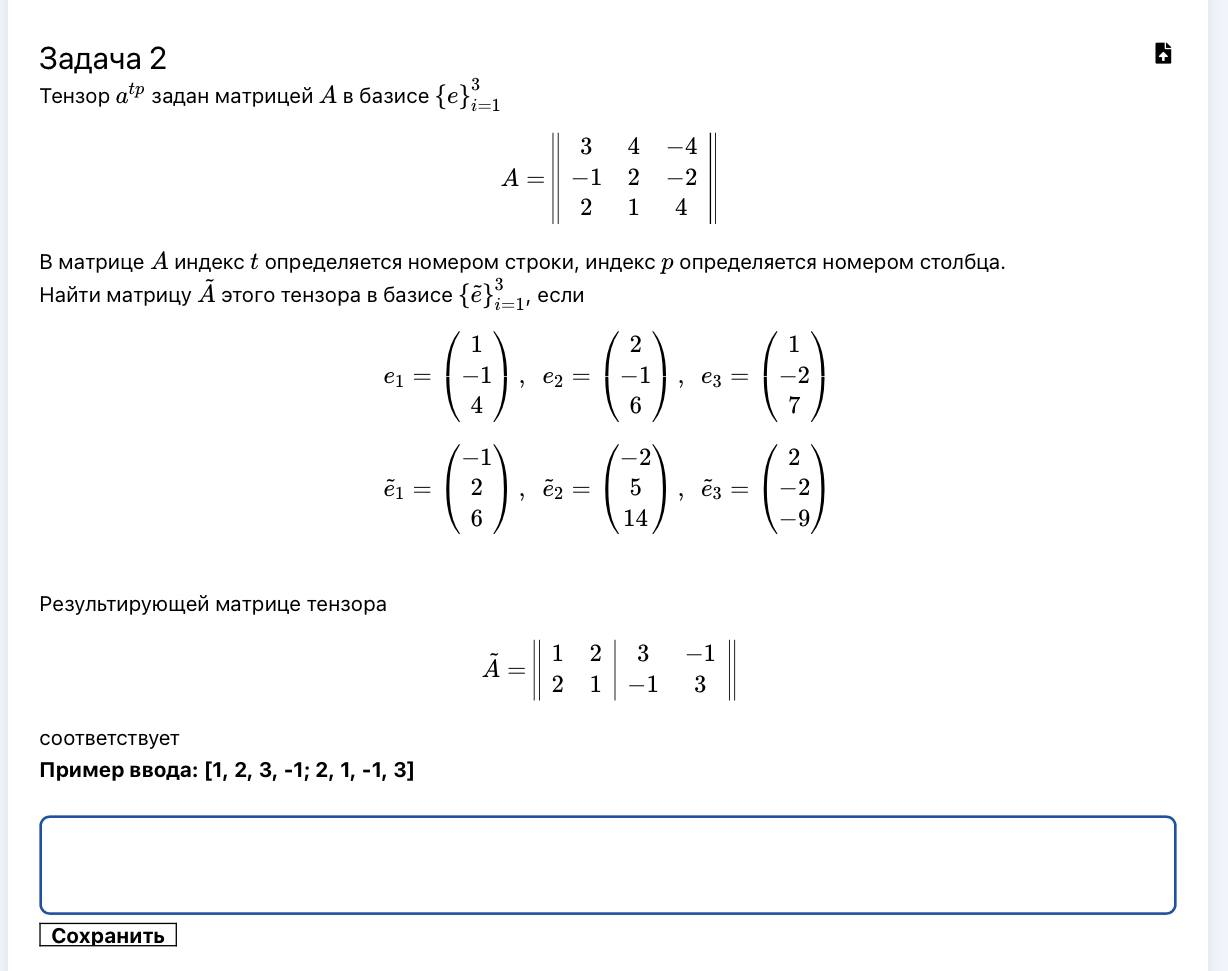

In [ ]:
A = np.array([[3, 4, -4], [-1, 2, -2], [2, 1, 4]])
E = np.array([[1, 2, 1], [-1, -1, -2], [4, 6, 7]])
Enew = np.array([[-1, -2, 2], [2, 5, -2], [6, 14, -9]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("jp, il, lp -> ij", S, S, A), to_string(np.round(np.einsum("jp, il, lp -> ij", S, S, A)))

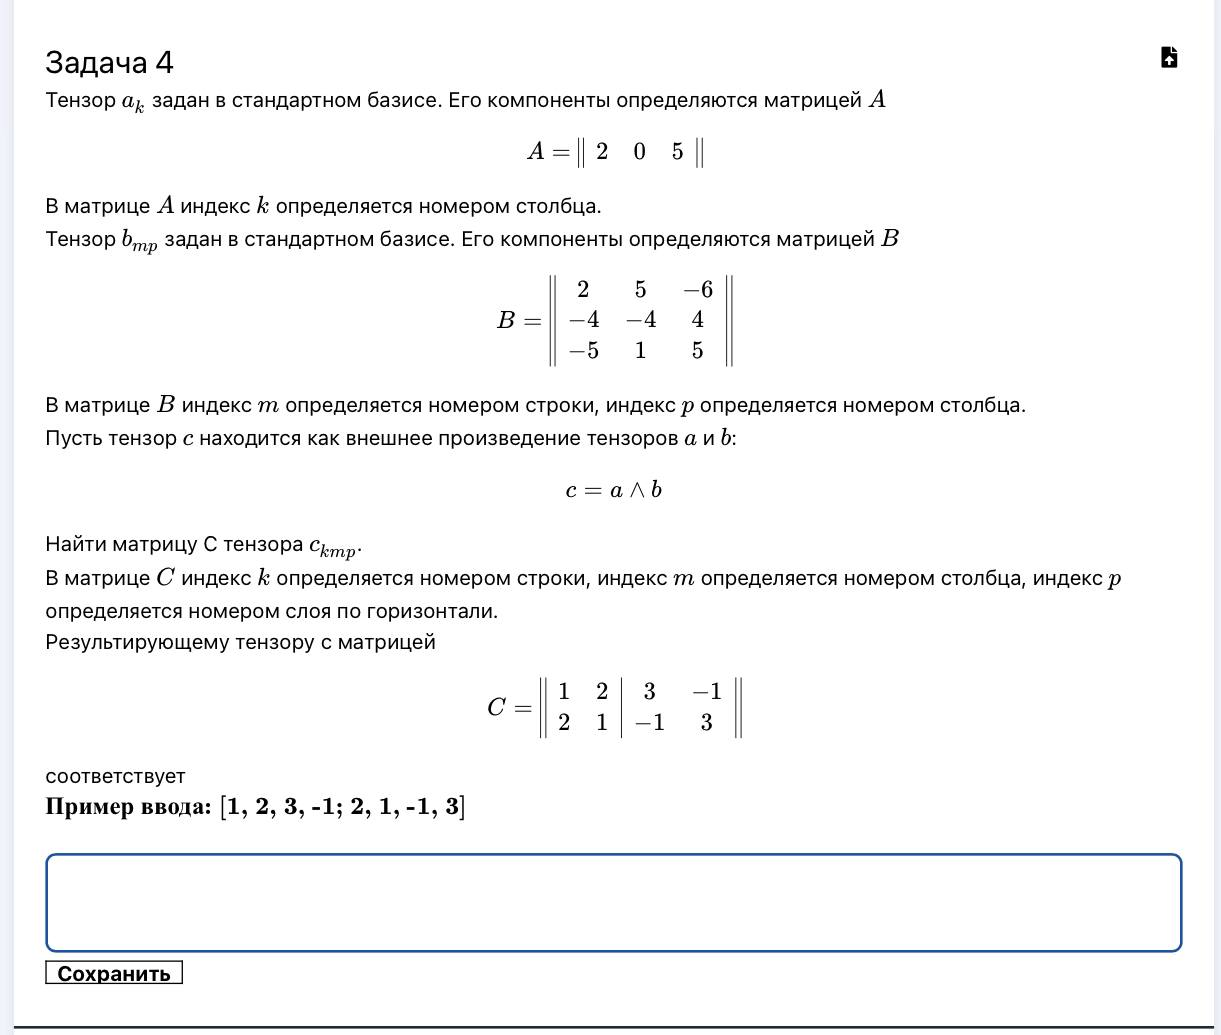

In [ ]:
first_task_solver(np.array([2, 0, 5]), np.array([[2, 5, -6], [-4, -4, 4], [-5, 1, 5]]))

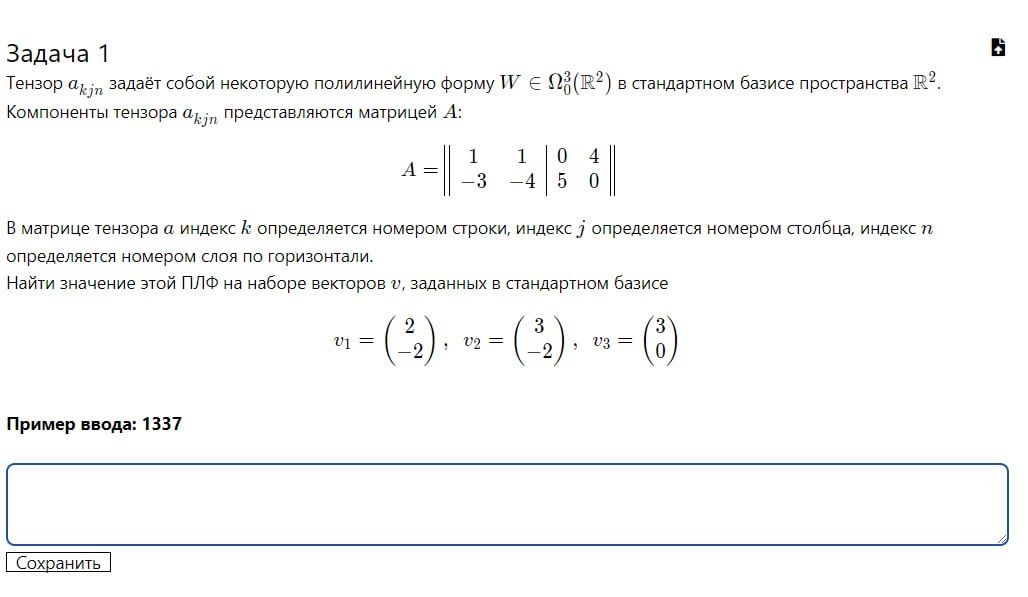

In [ ]:
A = np.array([[[1, 1], [-3, -4]], [[0, 4], [5, 0]]])

v1 = np.array([2, -2])

v2 = np.array([3, -2])

v3 = np.array([3, 0])


c = 0

for n in range(2):
    for k in range(2):
        for j in range(2):
            c += A[n][k][j] * v1[n] * v2[k] * v3[j]
c

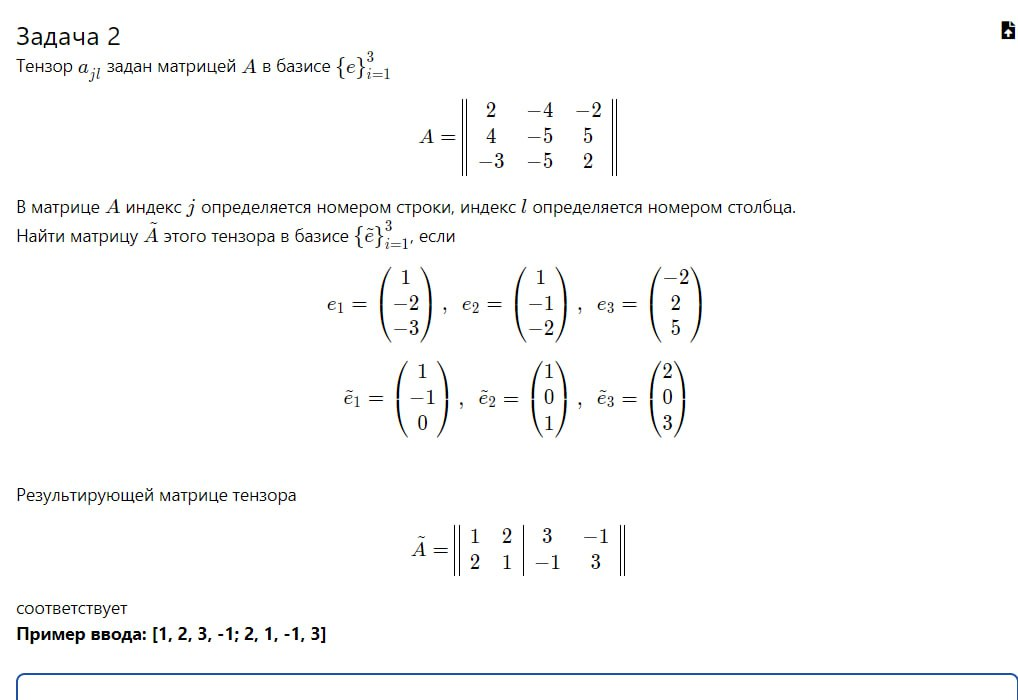

In [ ]:
A = np.array([[2, -4, -2], [4, -5, 5], [-3, -5, 2]])
E = np.array([[1, 1, -2], [-2, -1, 2], [-3, -2, 5]])
Enew = np.array([[1, 1, 2], [-1, 0, 0], [0, 1, 3]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("pj, li, lp -> ij", T, T, A)

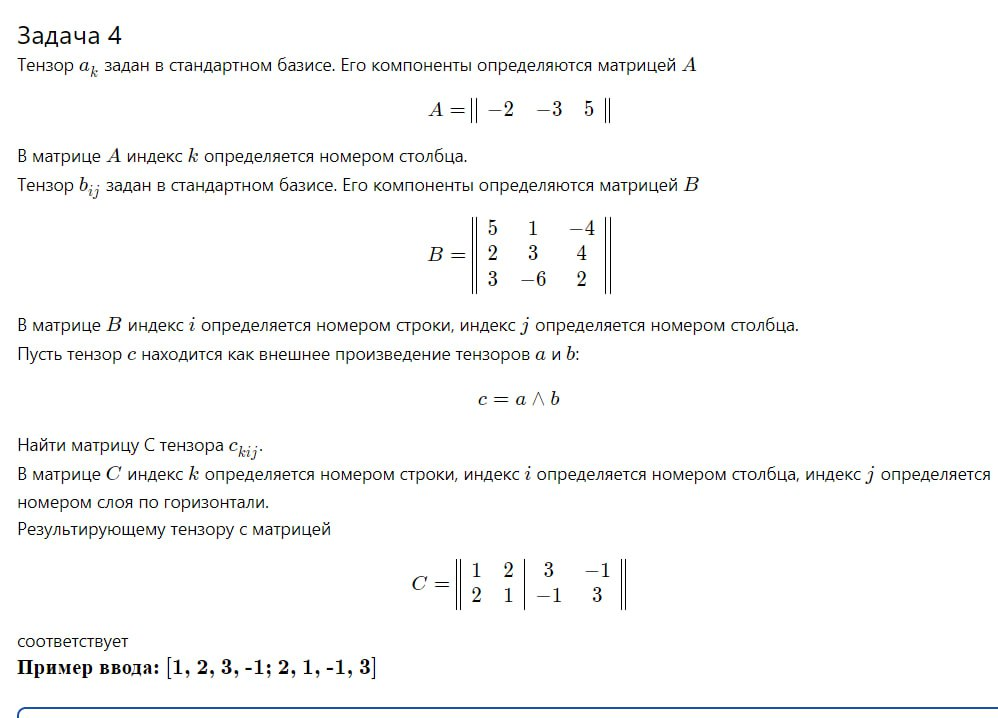

In [ ]:
first_task_solver(np.array([-2, -3, 5]), np.array([[5, 1, -4], [2, 3, 4], [3, -6, 2]]))

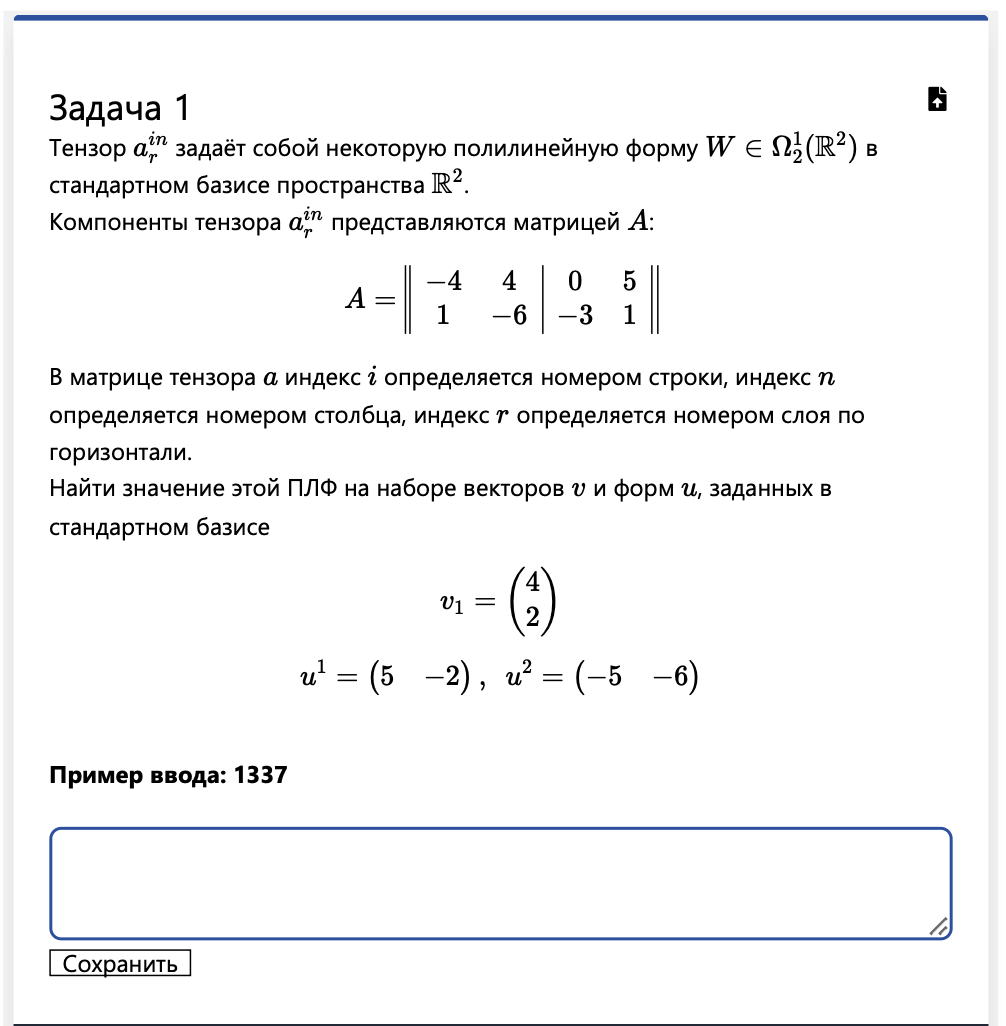

In [ ]:
A = np.array([[[-4, 4], [1, -6]], [[0, 5], [-3, 1]]])

v1 = np.array([4, 2])

u1 = np.array([5, -2])

u2 = np.array([-5, -6])


c = 0

for r in range(2):
    for i in range(2):
        for n in range(2):
            c += A[r][i][n] * v1[r] * u1[i] * u2[n]
c

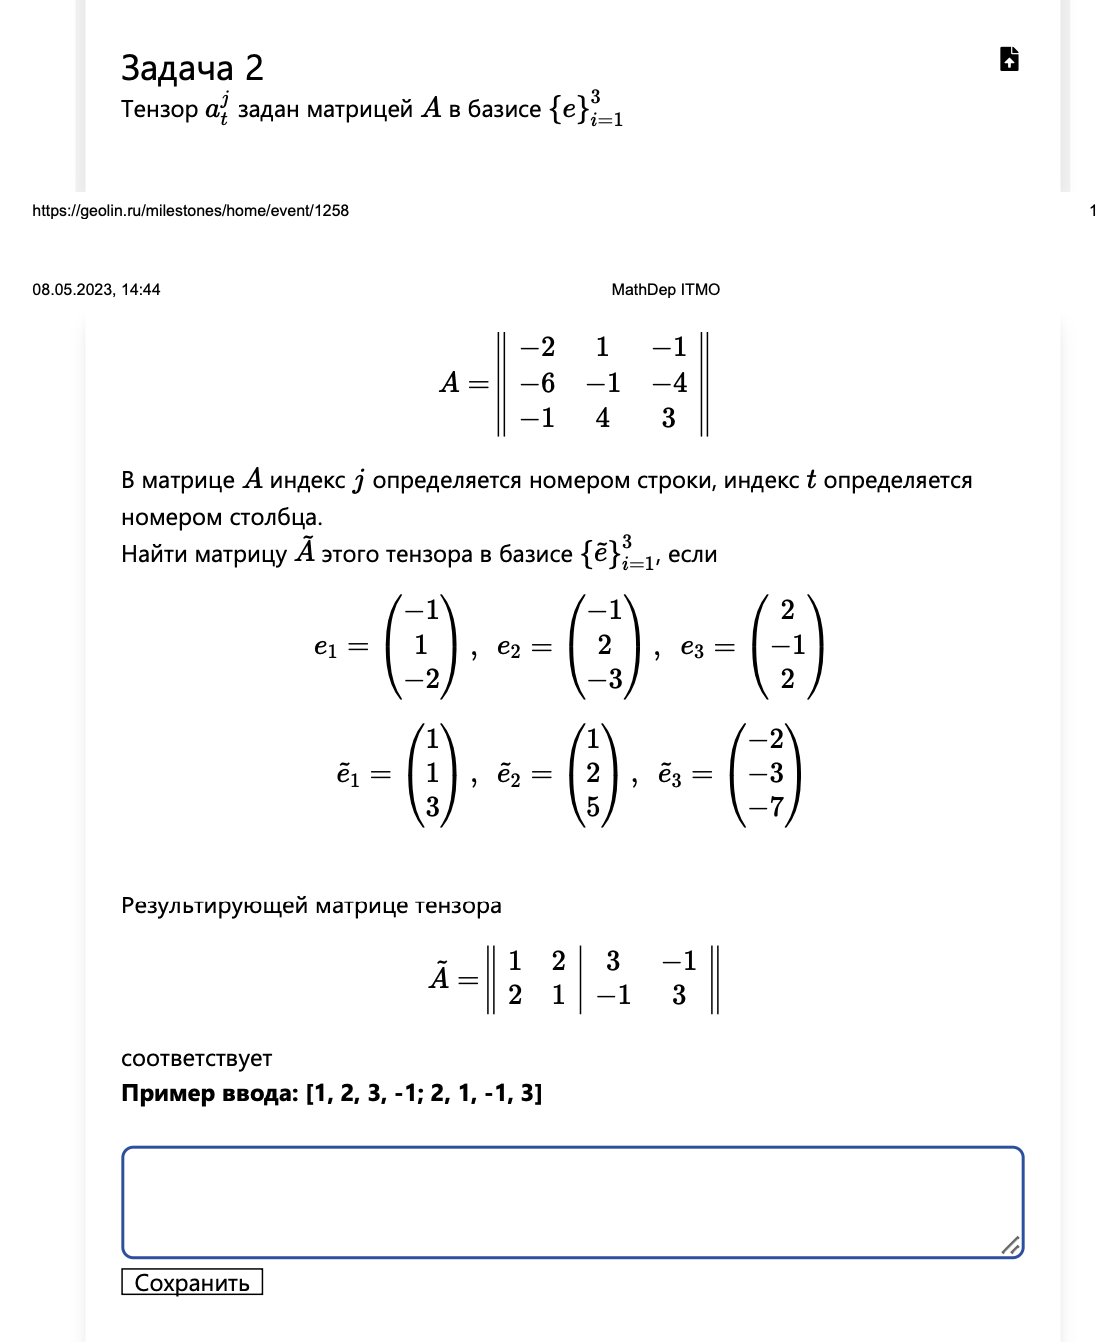

In [ ]:
A = np.array([[-2, 1, -1], [-6, -1, -4], [-1, 4, 3]])
E = np.array([[-1, -1, 2], [1, 2, -1], [-2, -3, 2]])
Enew = np.array([[1, 1, -2], [1, 2, -3], [3, 5, -7]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("pj, il, lp -> ij", T, S, A)

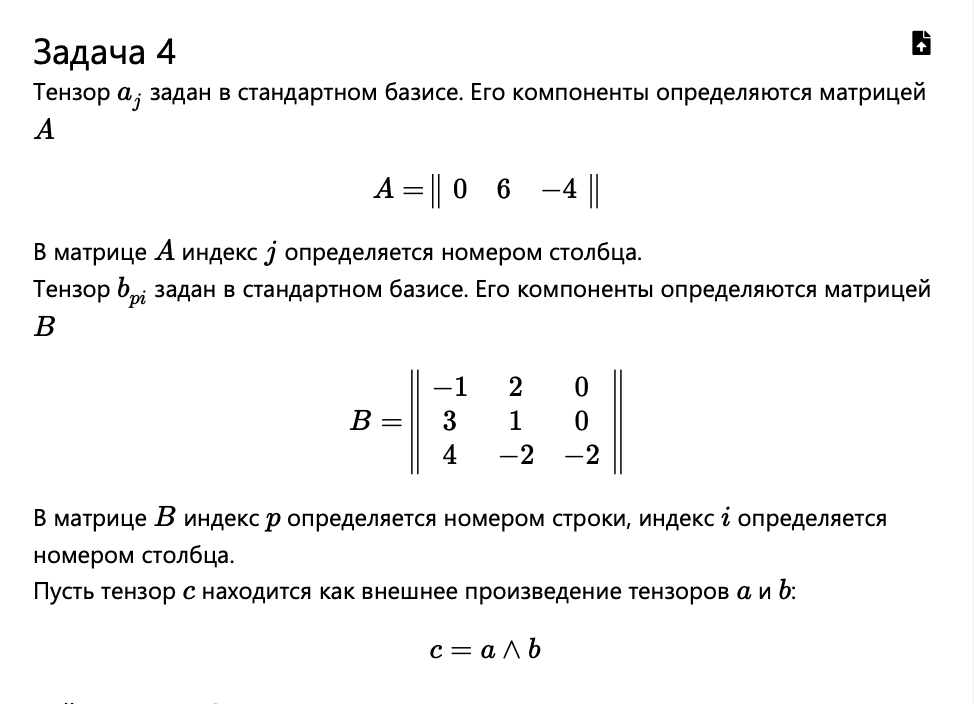

In [ ]:
first_task_solver(np.array([0, 6, -4]), np.array([[-1, 2, 0], [3, 1, 0], [4, -2, -2]]))

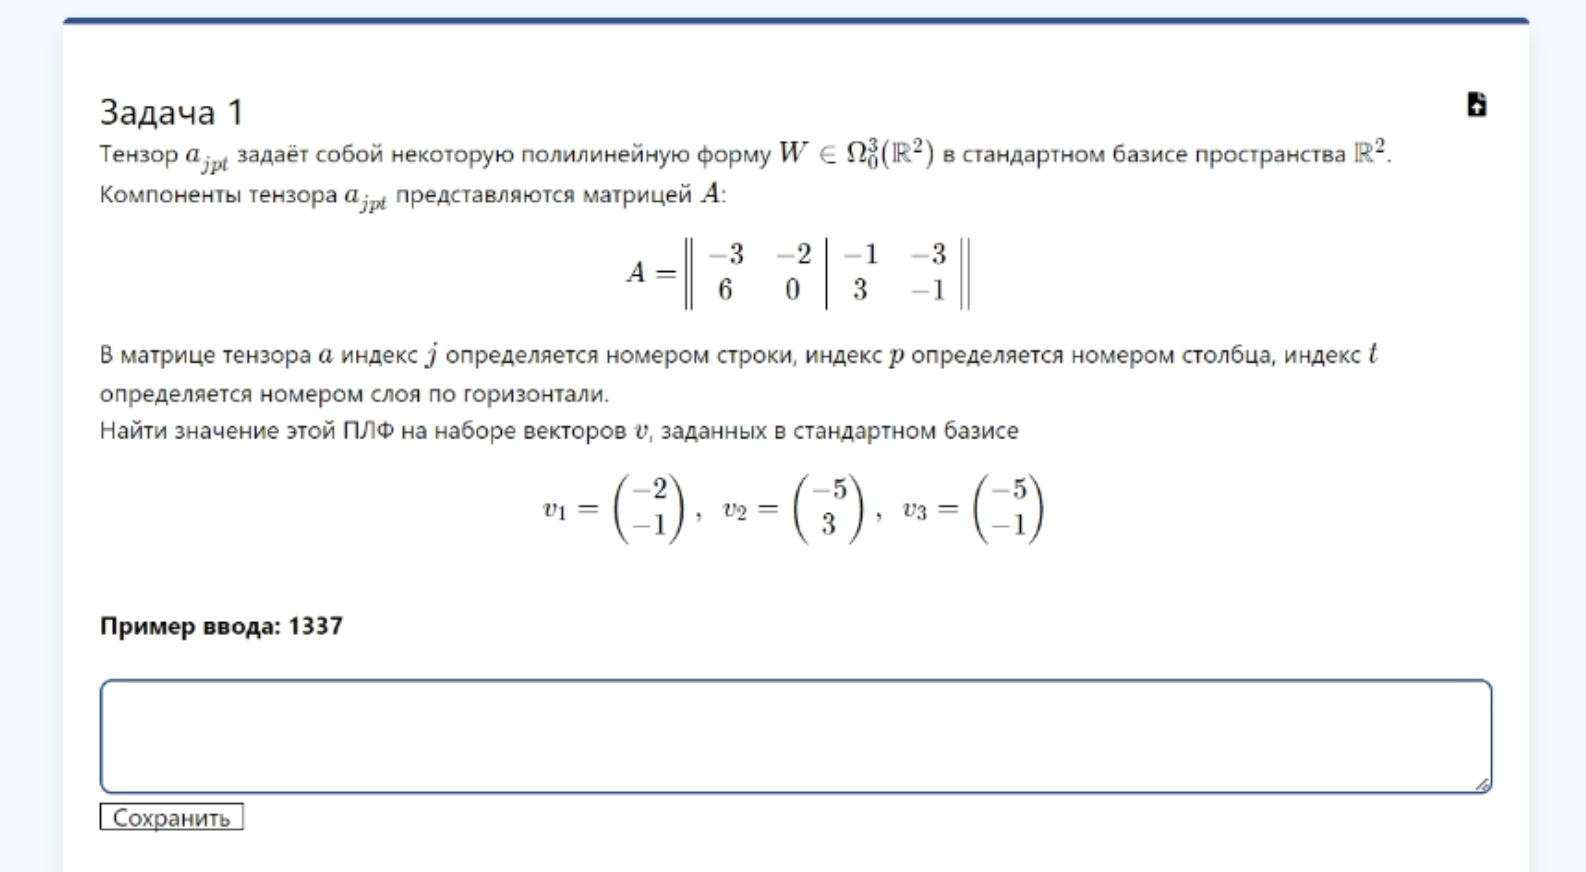

In [ ]:
def task_1():
    tens = [
        [[-3, -2], [6, 0]],
        [[-1, -3], [3, -1]]
    ]
    t = np.array(tens)

    v1 = [-2, -1]
    v2 = [-5, 3]
    v3 = [-5, -1]

    r = np.einsum("m, p, r, rmp", v1, v2, v3, t)
    return r
task_1()

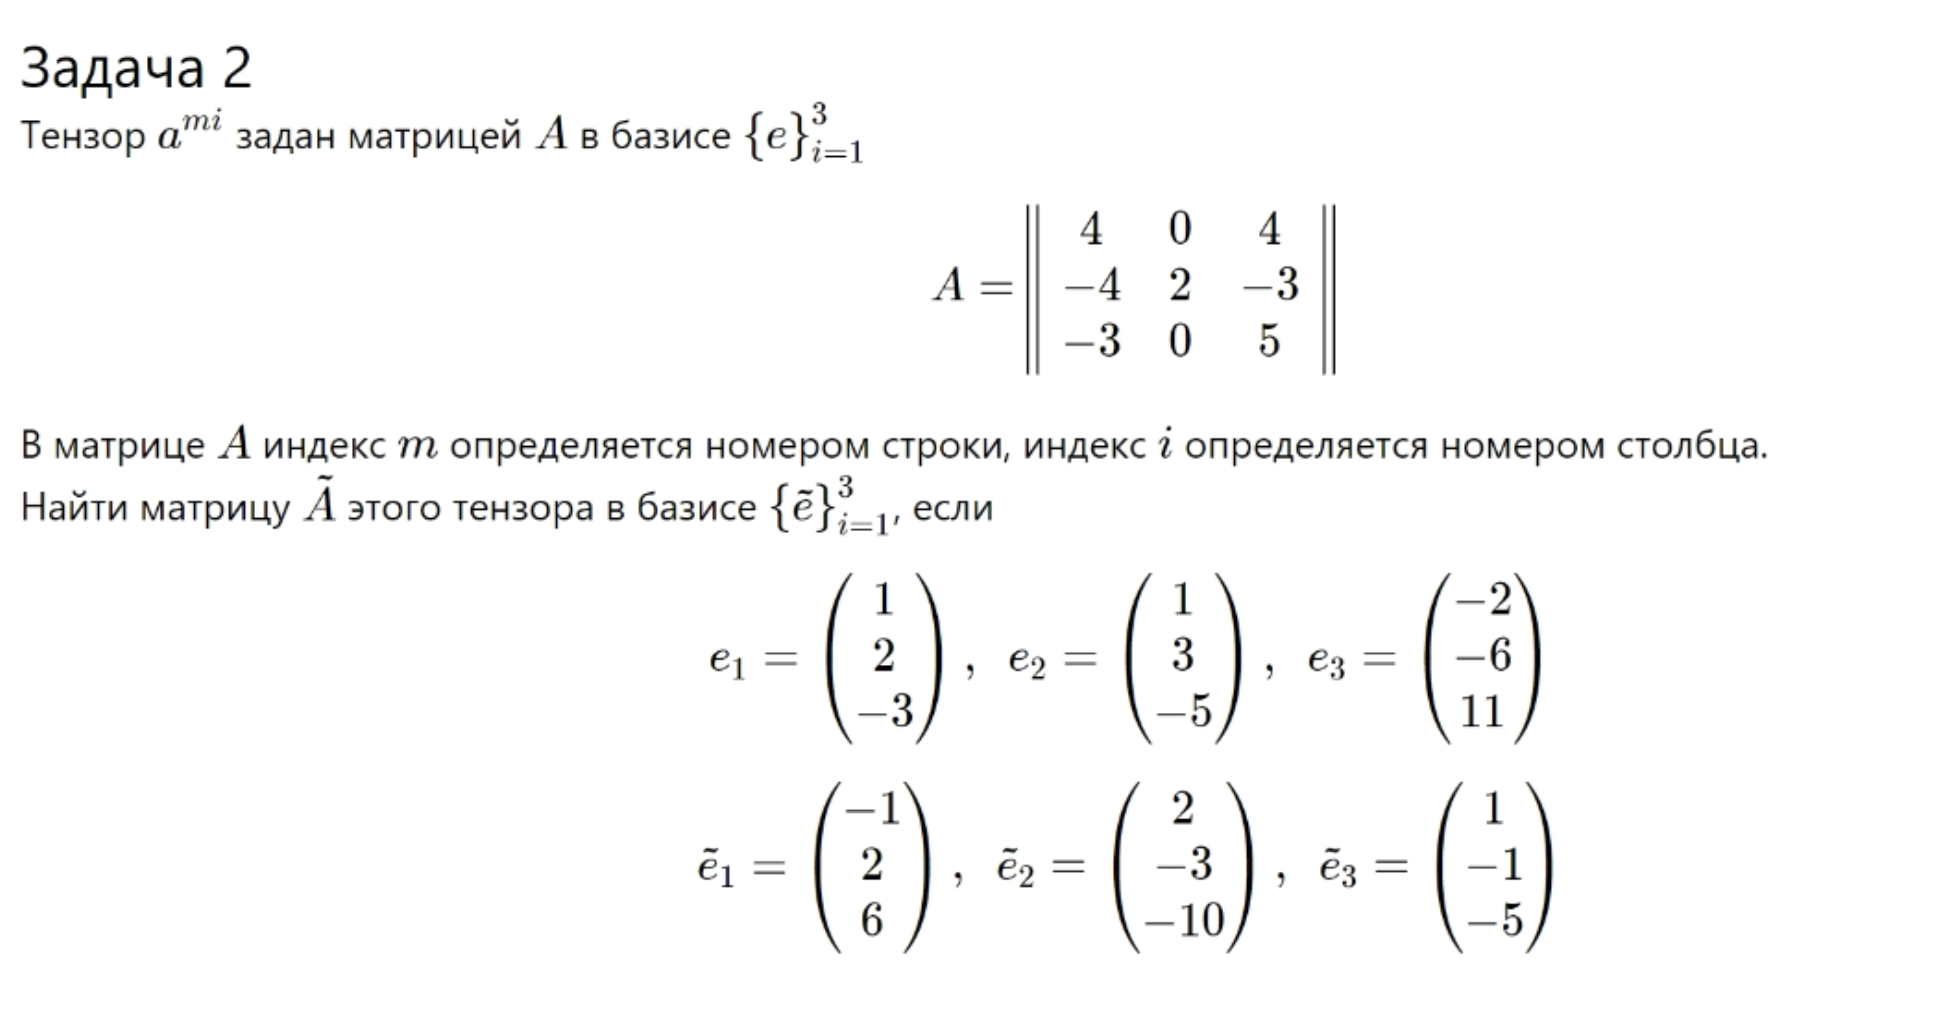

In [ ]:
A = np.array([[4, 0, 4], [-4, 2, -3], [-3, 0, 5]])
E = np.array([[1, 1, -2], [2, 3, -6], [-3, -5, 11]])
Enew = np.array([[-1, 2, 1], [2, -3, -1], [6, -10, -5]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("jp, il, lp -> ij", S, S, A), to_string(np.round(np.einsum("jp, il, lp -> ij", S, S, A)))

In [ ]:
first_task_solver(np.array([1, 2, 3]), np.array([[-2, 3, -3], [-2, -4, -1], [-5, -2, 2]]))

In [ ]:
a = np.array([[[0, 6], [-5, 6]], [[-1, -1], [1, -3]]])
at = np.array([[[0, -5], [6, 6]], [[-1, 1], [-1, -3]]])
1/2 * (a + at)

In [ ]:
from sympy import Sum, Symbol, sin, oo, cos, ln
n = Symbol('n', integer=True)
Sum((-1)**(n - 1) * cos((3*n) / (5*n + 2)), (n, 1, oo)).is_absolutely_convergent()

In [10]:
first_task_solver(np.array([2, 3, 0]), np.array([[-1, -3, -2], [6, -2, 1], [1, 2, -4]]))

'[0.0, 0.0, 0.0, 0.0, 0.0, -3.5, 0.0, 3.5, 0.0; 0.0, 0.0, 3.5, 0.0, 0.0, 0.0, -3.5, 0.0, 0.0; 0.0, -3.5, 0.0, 3.5, 0.0, 0.0, 0.0, 0.0, 0.0]'

In [11]:
first_task_solver(np.array([-2, 0, 5]), np.array([[-6, -2, 4], [3, -1, 5], [-5, 6, 0]]))

'[0.0, 0.0, 0.0, 0.0, 0.0, 11.5, 0.0, -11.5, 0.0; 0.0, 0.0, -11.5, 0.0, 0.0, 0.0, 11.5, 0.0, 0.0; 0.0, 11.5, 0.0, -11.5, 0.0, 0.0, 0.0, 0.0, 0.0]'

In [12]:
np.linalg.det(np.array([[1, -1, 0, -3], [-1, 0, 2, -2], [-2, 2, -1, 7], [-1, 1, -1, 5]]))

1.0